In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
from matplotlib.gridspec import GridSpec
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'Helvetica'
def rgb_to_hex(r, g, b):
    r, g, b = int(r), int(g), int(b)
    return '#' + hex(r)[2:].zfill(2) + hex(g)[2:].zfill(2) + hex(b)[2:].zfill(2)
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import seaborn as sns
color_list = [rgb_to_hex(237,74,184),rgb_to_hex(158,95,253),rgb_to_hex(255,206,81),rgb_to_hex(119,200,236),rgb_to_hex(24,218,210),rgb_to_hex(111,237,155),rgb_to_hex(102,0,51),rgb_to_hex(0,0,0),rgb_to_hex(211,196,147),rgb_to_hex(186,159,72),rgb_to_hex(89,80,65),rgb_to_hex(231,85,0),rgb_to_hex(0,138,148),rgb_to_hex(223,105,98)]
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
mark=np.array(['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X','o', 'v', '^', '<', '>', '8', 's', 'p', ])
color_list = color_list*2


In [2]:
def E(data_, h_pd=None, a=None, b=None):
	if isinstance(h_pd, pd.DataFrame): eta = h_pd['h']/data_['A']
	else: eta = data_['h']/data_['A']
	if a==None: a,b=0,1
	E=0
	t = [45, 55, 65, 75, 85]
	age = ['40_49', '50_59', '60_69', '70_79', '80_']
	for i in range(5):
		phi_t = np.exp(-eta/data_['eta_tilde'+age[i]])
		N_t = data_['RN'+age[i]]*data_['N']
		E+=sum((a*t[i]+b)*N_t*phi_t)
	return E

def b(data_, a):
	atNp, E_0 = 0,0
	eta = data_['h']/data_['A']
	t = [45, 55, 65, 75, 85]
	age = ['40_49', '50_59', '60_69', '70_79', '80_']
	for i in range(5): 
		E_0 += sum(data_['RD'+age[i]]*data_['D'])
		phi_t = np.exp(-eta/data_['eta_tilde'+age[i]])
		N_t = data_['RN'+age[i]]*data_['N']
		atNp += sum( a*t[i]*N_t*phi_t)
	return (E_0-atNp)/E_0 # b

# $\phi$ vs age (Total age)

/tmp/ipykernel_1704455/1264464357.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=age_label_list, y=phi_list, ax=ax, width=0.5, showfliers=False, palette=colors)
/tmp/ipykernel_1704455/1264464357.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=age_label_list, y=phi_list, ax=ax, width=0.5, showfliers=False, palette=colors)
/tmp/ipykernel_1704455/1264464357.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=age_label_list, y=phi_list, ax=ax, width=0.5, showfliers=False, palette=colors)
/tmp/ipykernel_1704455/1264464357.py:33:

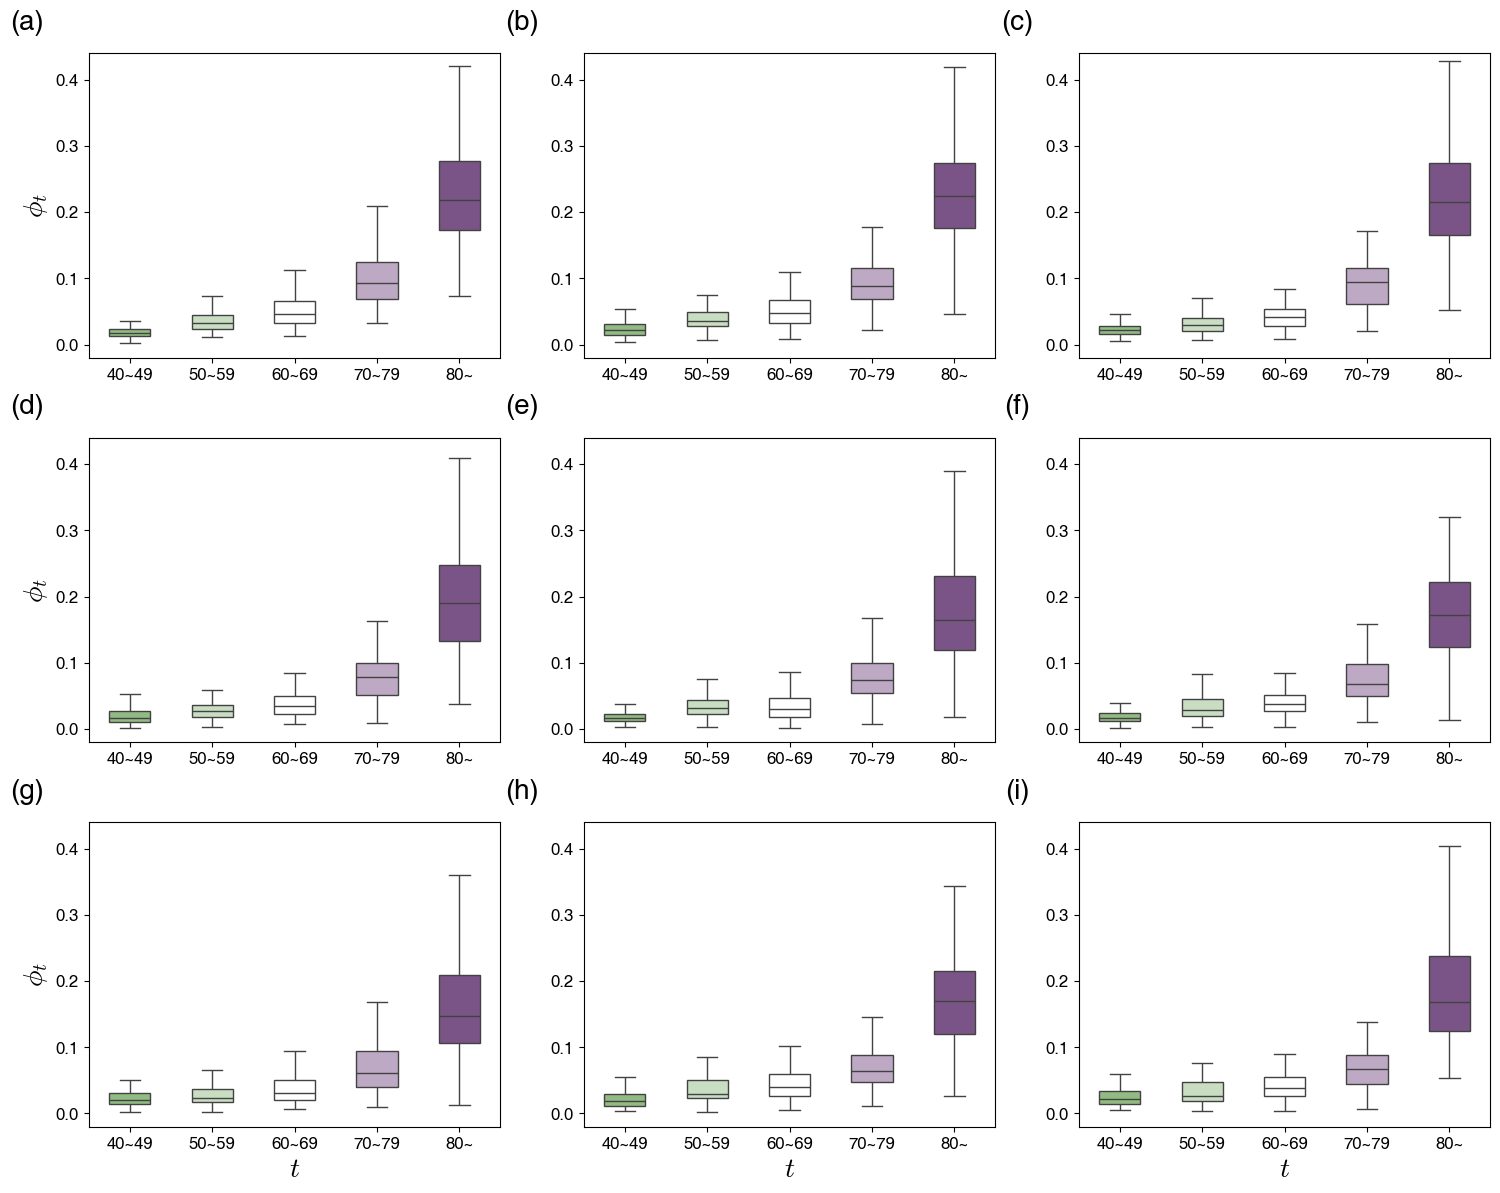

In [3]:
title_pos = [-0.15, 1.1]
title_size = 20
title_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

fig = plt.figure(figsize=(15, 12))
gs = GridSpec(3, 3, figure=fig)
c = 0
Pcorr_list = []
Scorr_list = []
age_labels = ["40~49", "50~59", "60~69", "70~79", "80~"]
colors = ['#8ec579', '#c6e2bc', '#ffffff', '#c0a5c8', '#804b90']
for year in range(2014, 2023):
    path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(year)+'_40.txt'
    data = pd.read_csv(path, sep=',')
    N = data.iloc[:, 6:15].copy().mul(data['N'], axis=0)
    D = data.iloc[:, 15:24].copy().mul(data['D'],axis=0)
    phi_df = D.iloc[:, :] / N.iloc[:, :].values
    phi_df.columns = phi_df.columns.str.slice(start=2)
    age_list = []
    age_label_list = []
    phi_list = []
    age_num_list = [45, 55, 65, 75, 85]
    for i in range(5):
        age_list+=[age_num_list[i]]*len(data)
        age_label_list+=[age_labels[i]]*len(data)
        phi_list+=list(phi_df[phi_df.columns[4:][i]])
    pcorr, p_value = pearsonr(age_list, phi_list)
    Pcorr_list.append(pcorr)
    scorr, p_value = spearmanr(age_list, phi_list)
    Scorr_list.append(scorr)

    ax = fig.add_subplot(gs[c // 3, c % 3])
    sns.boxplot(x=age_label_list, y=phi_list, ax=ax, width=0.5, showfliers=False, palette=colors)  
    ax.set_ylim(-0.02, 0.44)
    if c >5:ax.set_xlabel(r'$t$',size=20)
    if c %3 == 0: ax.set_ylabel(r'$\phi_t$',size=20)

    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    ax.text(title_pos[0], title_pos[1], f'({title_list[c]})', fontsize=title_size,
            ha='center', va='center', transform=ax.transAxes)
    c += 1

plt.tight_layout()
# plt.savefig('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/figure/phi_age.pdf', format='pdf', transparent=True)
plt.show()

In [4]:
len(data)

124

In [5]:
print(Pcorr_list)
print(Scorr_list)

[0.7610093415060851, 0.7126887134682108, 0.7376835937790616, 0.7192061029035656, 0.6250052089500502, 0.6982932996593235, 0.5246859353938139, 0.6944763436427299, 0.680574988958758]
[0.8938293548952577, 0.8357039491261445, 0.8366362441609888, 0.79262650883132, 0.7735090869049984, 0.7852925624125244, 0.7103179293583713, 0.7632563497079812, 0.7496188015274061]


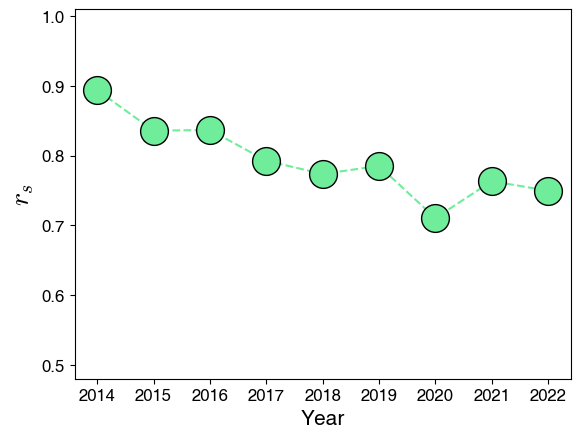

In [6]:
plt.plot(range(2014, 2023), Scorr_list, markersize=20, marker='o', linestyle='--', mec='k', c=color_list[5])
plt.ylim(.48, 1.01)
plt.xlabel('Year' ,size='15')
plt.ylabel(r'$r_s$' ,size='20')
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

/tmp/ipykernel_1704455/455212141.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=age_label_list, y=phi_list, width=0.5, showfliers=False, palette=colors, ax=ax)


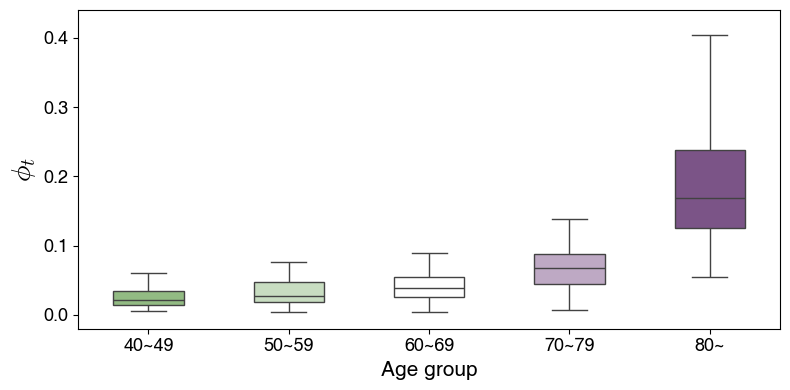

In [7]:

# 데이터 로드
age_labels = ["40~49", "50~59", "60~69", "70~79", "80~"]
colors = ['#8ec579', '#c6e2bc', '#ffffff', '#c0a5c8', '#804b90']
path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(2022)+'_40.txt'
data = pd.read_csv(path, sep=',')

# phi_df 계산
N = data.iloc[:, 6:15].copy().mul(data['N'], axis=0)
D = data.iloc[:, 15:24].copy().mul(data['D'], axis=0)
phi_df = D.iloc[:, :] / N.iloc[:, :].values
phi_df.columns = phi_df.columns.str.slice(start=2)

# 리스트 만들기
age_list = []
age_label_list = []
phi_list = []
age_num_list = [45, 55, 65, 75, 85]
for i in range(5):
    age_list += [age_num_list[i]] * len(data)
    age_label_list += [age_labels[i]] * len(data)
    phi_list += list(phi_df[phi_df.columns[4:][i]])

# 메인 플롯
fig, ax = plt.subplots(figsize=(8, 4))  # 가로로 긴 플롯
sns.boxplot(x=age_label_list, y=phi_list, width=0.5, showfliers=False, palette=colors, ax=ax)
ax.set_ylim(-0.02, 0.44)
ax.set_ylabel(r'$\phi_t$',size=20)
ax.set_xlabel(r'Age group',size=15)
ax.tick_params(axis='both', labelsize=13)

# # 인셋 플롯 추가 (위치 조정 가능)
# ax_inset = inset_axes(ax, width="50%", height="30%", bbox_to_anchor=(-0.4, -0.55, 1, 1.5), bbox_transform=ax.transAxes)  
# ax_inset.plot(range(2014, 2023), Scorr_list, markersize=8, marker='o', linestyle='--', mec='k', c=color_list[5])
# ax_inset.set_ylim(0.48, 1.01)
# ax_inset.set_xlabel('Year', fontsize=12)
# ax_inset.set_ylabel(r'$r_s$', fontsize=16)
# ax_inset.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
# plt.savefig('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/figure/age_phi_spearman.pdf',format='pdf',transparent=True)
plt.show()


In [12]:
# age_label_list와 phi_list를 DataFrame으로 만든다
df = pd.DataFrame({'age': age_label_list, 'phi': phi_list})

# 나이 그룹별로 median 계산
medians_by_age = df.groupby('age')['phi'].median()

# 가장 작은 median과 가장 큰 median 찾기
min_median = medians_by_age.min()
max_median = medians_by_age.max()

print(f"Median values range from {min_median:.4f} to {max_median:.4f}")

Median values range from 0.0219 to 0.1690


# $\phi$ vs $\eta$

PearsonRResult(statistic=-0.32640202292054765, pvalue=6.936083281559917e-05)
PearsonRResult(statistic=-0.2500370378770834, pvalue=0.0026907836406063748)
PearsonRResult(statistic=-0.34704711713239783, pvalue=3.48407171591606e-05)
PearsonRResult(statistic=-0.3243233704701444, pvalue=6.900560639481408e-05)
PearsonRResult(statistic=0.01091864822337532, pvalue=0.8959332011699898)
PearsonRResult(statistic=-0.007326531603606024, pvalue=0.9353693668109694)
PearsonRResult(statistic=-0.07502080706287619, pvalue=0.4134620763021913)
PearsonRResult(statistic=0.11532003623712309, pvalue=0.22597768509791022)
PearsonRResult(statistic=-0.1086948970630005, pvalue=0.22948721469613712)


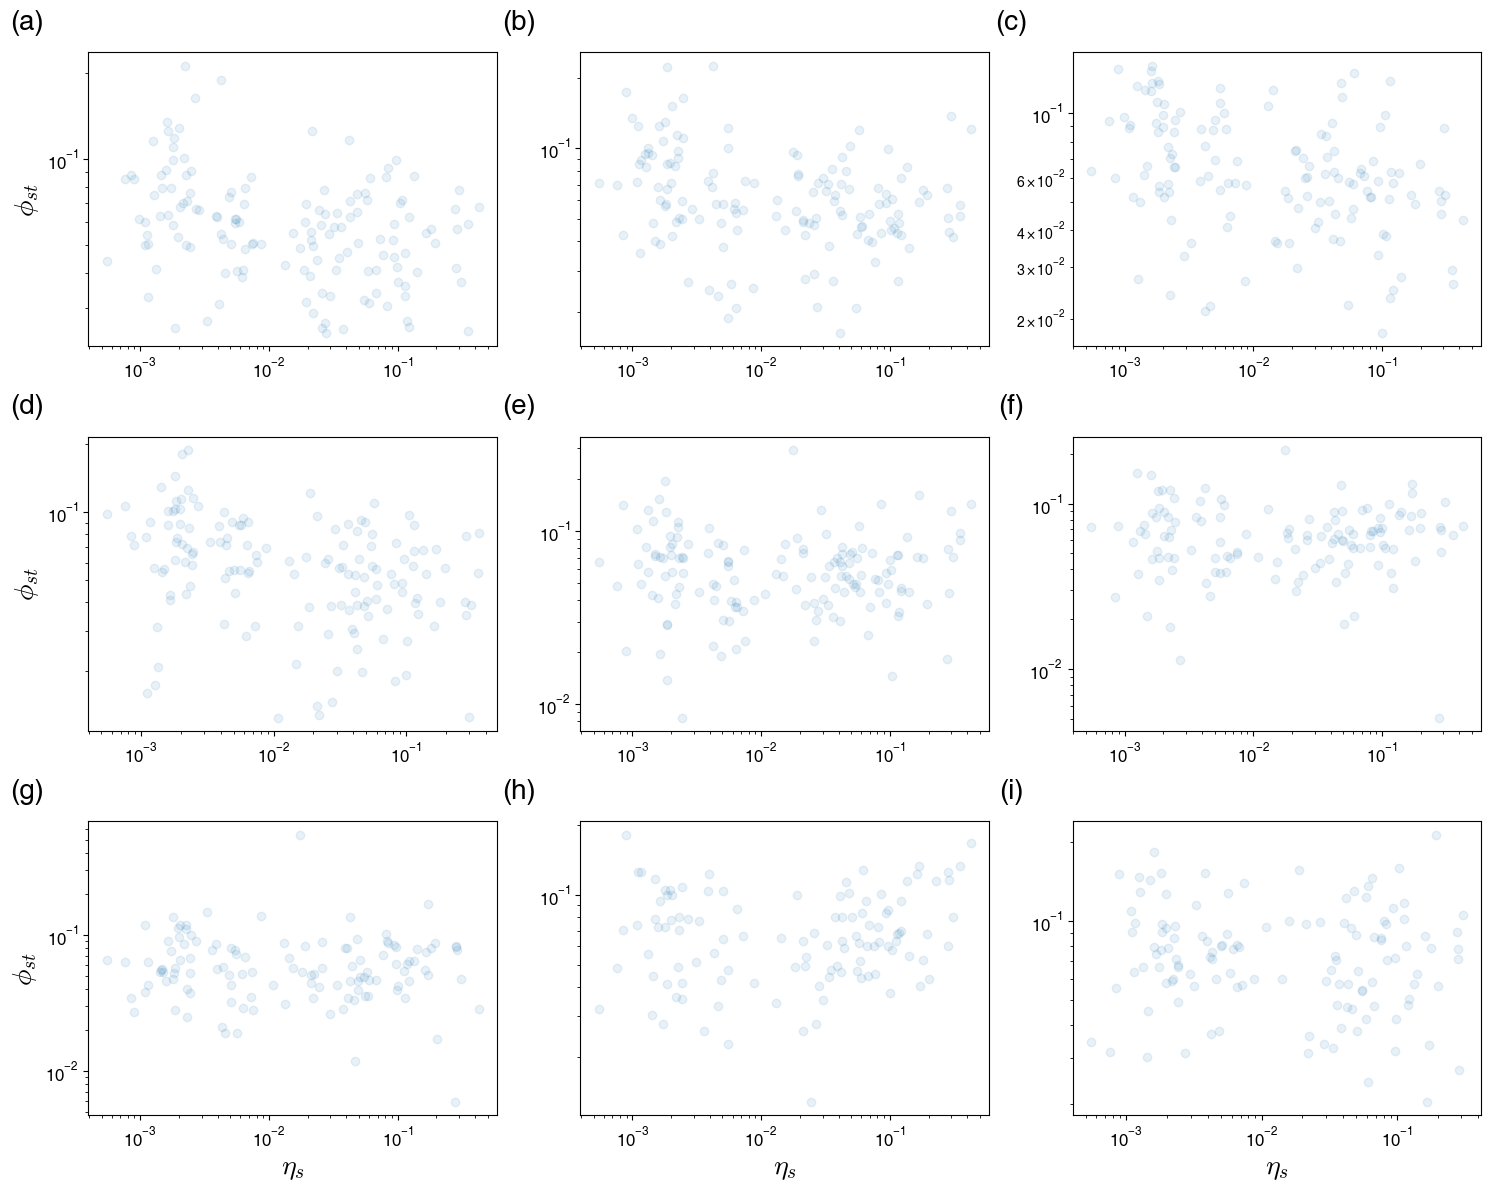

In [8]:
title_pos = [-0.15, 1.1]
title_size = 20
title_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

fig = plt.figure(figsize=(15, 12))
gs = GridSpec(3, 3, figure=fig)
c = 0
Pcorr_list = []
Scorr_list = []
# age_labels = ["40~49", "50~59", "60~69", "70~79", "80~"]
colors = ['#8ec579', '#c6e2bc', '#ffffff', '#c0a5c8', '#804b90']
for year in range(2014, 2023):
    path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(year)+'_40.txt'
    data = pd.read_csv(path, sep=',')
    N = data.iloc[:, 6:15].copy().mul(data['N'], axis=0)
    D = data.iloc[:, 15:24].copy().mul(data['D'],axis=0)
    eta = data['h'] / data['A']
    # phi_df = D.iloc[:, :] / N.iloc[:, :].values
    # phi_df.columns = phi_df.columns.str.slice(start=2)
    
    # phi_list = []
    # eta_list = []
    # for i in range(5)[1:2]:
    #     phi_list+=list(phi_df[phi_df.columns[4:][i]])
    #     eta_list+=list(eta)
    # pcorr, p_value = pearsonr(eta_list, phi_list)
    # Pcorr_list.append(pcorr)
    # scorr, p_value = spearmanr(eta_list, phi_list)
    # Scorr_list.append(scorr)

    ax = fig.add_subplot(gs[c // 3, c % 3])
    # sns.boxplot(x=age_label_list, y=phi_list, ax=ax, width=0.5, showfliers=False, palette=colors)  
    # ax.scatter(eta_list, phi_list, alpha=0.1)
    ax.scatter(eta, data['D']/data['N'], alpha=0.1)
    # ax.set_ylim(-0.02, 0.44)
    if c >5:ax.set_xlabel(r'$\eta_s$',size=20)
    if c %3 == 0: ax.set_ylabel(r'$\phi_{st}$',size=20)
    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    ax.text(title_pos[0], title_pos[1], f'({title_list[c]})', fontsize=title_size,
            ha='center', va='center', transform=ax.transAxes)
    print(pearsonr(np.log10(eta), np.log10(data['D']/data['N'])))
    c += 1

plt.tight_layout()
# plt.savefig('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/figure/phi_age.pdf', format='pdf', transparent=True)
plt.show()

In [9]:
print(Pcorr_list)
print(Scorr_list)

[]
[]


# $E$ vs $a$

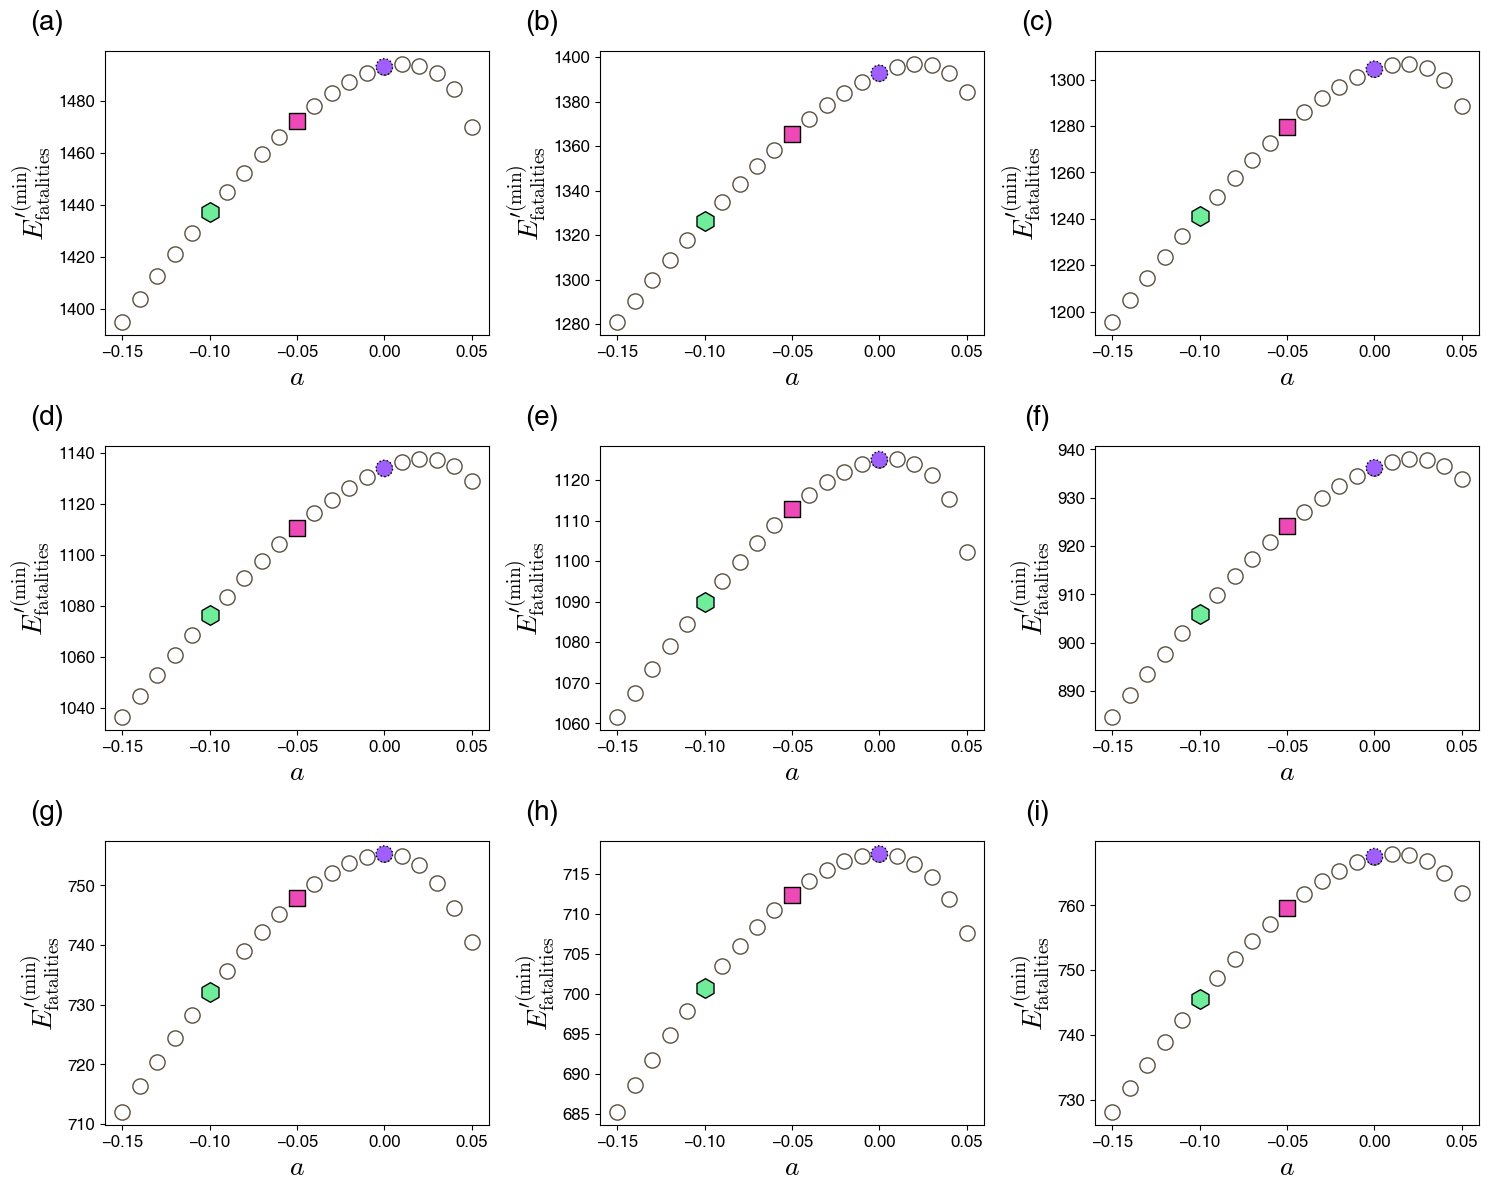

In [10]:
title_pos=[-0.15, 1.1]
title_size = 20
title_list = ['a', 'b', 'c', 'd', 'e','f','g','h','i']

save_path='/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b/opt_E_h_a015_005/'
fig = plt.figure(figsize=(15, 12))
gs = GridSpec(3, 3, figure=fig)
c=0
for year in range(2014,2023):
	path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(year)+'_40.txt'
	data = pd.read_csv(path,sep=',')
	ai=0
	E_list=[]
	for i in range(21):
		E_ = np.load(save_path+str(year)+'_age_E_a_'+str(ai)+'.npy')
		E_list.append(E_[-1])
		# h_opt = pd.read_csv(save_path+str(year)+'MC_age_h_opt_a_'+str(ai)+'.csv')
		# E_list.append(E(data, h_pd=h_opt))

		ai+=1
	ax = fig.add_subplot(gs[c//3, c%3])
	# ax.plot(np.linspace(-0.15,0.05,21), [E(data)]*21, 'r--')
	ax.scatter(np.linspace(-0.15,0.05,21), E_list, c='w', s=120, ec=rgb_to_hex(89,80,65)) #label=str(year)
	ax.scatter(np.linspace(-0.15,0.05,21)[15], E_list[15], marker='o', ec='k',s=140,c=rgb_to_hex(158,95,253),linestyle=':')
	ax.scatter(np.linspace(-0.15,0.05,21)[10], E_list[10], marker='s', ec='k',s=120,c=rgb_to_hex(237,74,184))
	ax.scatter(np.linspace(-0.15,0.05,21)[5], E_list[5], marker='h', ec='k',s=200,c=rgb_to_hex(111,237,155))
	# ax.set_ylim(500,2000)
	# ax.set_yscale('log')
	ax.set_xlabel(r'$a$',size=20)
	ax.set_ylabel(r'$E^{\prime\mathrm{(min)}}_\mathrm{fatalities}$',size=20)
	ax.tick_params(axis='x', labelsize=12)
	ax.tick_params(axis='y', labelsize=12)
	# ax.legend(fontsize='large')
	ax.text(title_pos[0], title_pos[1], '('+title_list[c]+')', fontsize=title_size,  ha='center', va='center',transform=ax.transAxes)
	c+=1
plt.tight_layout()
# plt.savefig('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/figure/E_a.pdf',format='pdf',transparent=True)

plt.show()

## 전국 지역 확인

In [11]:
year= 2014
i=15
path='/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/'
h_opt = pd.read_csv(path+'at_b/opt_E_h_a015_005/'+str(year)+'MC_age_h_opt_a_'+str(i)+'.csv')
data = pd.read_csv(path+'data_over40/'+str(year)+'_40.txt',sep=',')

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from scipy import stats
def rgb_to_hex(r, g, b):
    r, g, b = int(r), int(g), int(b)
    return '#' + hex(r)[2:].zfill(2) + hex(g)[2:].zfill(2) + hex(b)[2:].zfill(2)
from matplotlib.colors import LinearSegmentedColormap, Normalize

# colors_p = [rgb_to_hex(255,255,255),rgb_to_hex(255,255,255),rgb_to_hex(255,255,255),'#BD66A7','#BD66A7','#BDBDBD','#2D7811']
colors_p = ['#BD66A7','#BDBDBD','#2D7811']
cmap_p = LinearSegmentedColormap.from_list('my_cmap', colors_p, gamma=1)

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'Helvetica'

In [13]:
mark=np.array(['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X','o', 'v', '^', '<', '>', '8', 's', 'p', ])
def rgb_to_hex(r, g, b):
    r, g, b = int(r), int(g), int(b)
    return '#' + hex(r)[2:].zfill(2) + hex(g)[2:].zfill(2) + hex(b)[2:].zfill(2)
color_list = [rgb_to_hex(237,74,184),rgb_to_hex(158,95,253),rgb_to_hex(255,206,81),rgb_to_hex(119,200,236),rgb_to_hex(24,218,210),rgb_to_hex(111,237,155),rgb_to_hex(102,0,51),rgb_to_hex(0,0,0),rgb_to_hex(211,196,147),rgb_to_hex(186,159,72),rgb_to_hex(89,80,65),rgb_to_hex(231,85,0),rgb_to_hex(0,138,148),rgb_to_hex(223,105,98)]
color_list = color_list*2

In [14]:
def E(data_, h_pd=None, a=None, b=None):
	if isinstance(h_pd, pd.DataFrame): 
		eta = h_pd['h'] / data_['A']
	else: 
		eta = data_['h'] / data_['A']
	if a is None: 
		a, b = 0, 1

	E = pd.Series(0, index=data_.index)  # 각 row별로 저장할 E를 Series로 초기화

	t = [45, 55, 65, 75, 85]
	age = ['40_49', '50_59', '60_69', '70_79', '80_']

	for i in range(5):
		phi_t = np.exp(-eta / data_['eta_tilde' + age[i]])
		N_t = data_['RN' + age[i]] * data_['N']
		E += (a * t[i] + b) * N_t * phi_t  # row-wise 연산

	return E  # 각 row별 E 값이 담긴 Series 반환


def b(data_, a):
	atNp, E_0 = 0,0
	eta = data_['h']/data_['A']
	t = [45, 55, 65, 75, 85]
	age = ['40_49', '50_59', '60_69', '70_79', '80_']
	for i in range(5): 
		E_0 += sum(data_['RD'+age[i]]*data_['D'])
		phi_t = np.exp(-eta/data_['eta_tilde'+age[i]])
		N_t = data_['RN'+age[i]]*data_['N']
		atNp += sum( a*t[i]*N_t*phi_t)
	return (E_0-atNp)/E_0 # b

In [15]:
year= 2014
i=15
data_path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(year)+'_40.txt'
h_01_path='/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b/opt_E_h_a015_005/'+str(year)+'MC_age_h_opt_a_5.csv'
h_00_path='/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b/opt_E_h_a015_005/'+str(year)+'MC_age_h_opt_a_15.csv'

data = pd.read_csv(data_path, sep=',')
h_01=pd.read_csv(h_01_path)
h_00=pd.read_csv(h_00_path)

# 연령대별 중심값
age_groups = ['40_49', '50_59', '60_69', '70_79', '80_']
age_centers = [45, 55, 65, 75, 85]

# 숫자형 컬럼만 선택
df_numeric = data.select_dtypes(include=[np.number])

# 연령대별 신환자 비율 컬럼 찾기
rn_columns = [col for col in df_numeric.columns if col.startswith("RN") and col[2:] in age_groups]

# 가중 평균 나이 계산 (groupby 없이 로우 순서 그대로)
data["weighted_age"] = data[rn_columns].mul(age_centers).sum(axis=1)

a_01=-0.1
b_01 = b(data, a_01)
E_01 = E(data, h_01, a_01, b_01)

E_00 = E(data, h_00, 0, 1)

dh = h_01 - h_00
dE = E_01 - E_00

In [16]:
colors_age = ['#8EC579', '#FFFFFF','#804B90']
cmap_age = LinearSegmentedColormap.from_list('my_cmap', colors_age, gamma=1)
age_data = pd.read_csv(path+'average_age_2022.csv',sep=',')

data_list = []
for cd in kr_sgg['SIG_CD']:
    if cd == '28170': # 미추홀
        cd='28177'
        data_list.append(list(age_data[age_data['SIG_CD'] == int(cd)*10**5]['average_age'])[0])
    elif cd == '36110':data_list.append(38.1)
    else:
        data_list.append(list(age_data[age_data['SIG_CD'] == int(cd)*10**5]['average_age'])[0])
kr_sgg['age']=data_list
norm_age=Normalize(vmin=37, vmax=59)

FileNotFoundError: [Errno 2] No such file or directory: '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/average_age_2022.csv'

In [ ]:
age_data

NameError: name 'age_data' is not defined

In [ ]:
a_=-0.05
b_ = b(data,a=a_)
E(data, h_pd=h_opt, a=a_, b=b_)

0      16.954276
1      15.373590
2       4.824994
3      14.431251
4       8.294035
         ...    
138     6.520159
139    12.186692
140    37.379835
141    28.472822
142     4.340346
Length: 143, dtype: float64

In [17]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'Helvetica'

In [18]:
def find_min_a(data):
	ai=0
	E_list=[]
	E_a_min = []
	for i in range(21):
		E_ = np.load(save_path+str(year)+'_age_E_a_'+str(ai)+'.npy')
		E_list.append(E_[-1])
		ai+=1
	a_i=0
	for a in np.linspace(-0.15, 0.05, 21):
		if a*85+b(data,a) > 0: 
			E_a_min.append(E_list[a_i])
			break
		a_i+=1
	return a_i

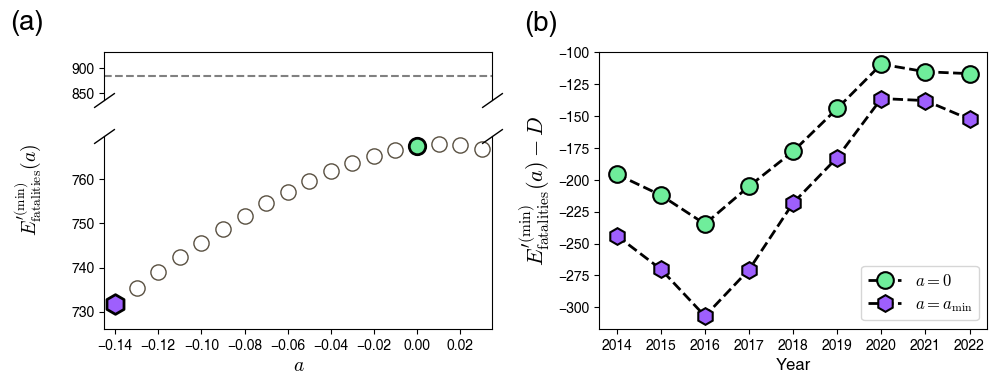

In [19]:
title_pos=[-0.15, 1.1]
title_size = 20
title_list = ['a', 'b', 'c', 'd', 'e','f','g','h','i']
fig = plt.figure(figsize=(10, 4))
gs = GridSpec(2, 2, figure=fig, height_ratios=[1,4])

i_0=15
i_01_=5
i_003=18
i_001_=14

E_a0=[]
E_a005=[]
E_a005_=[]
E_a01_=[]
D_list=[]
for year in range(2014,2023):
	path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(year)+'_40.txt'
	data = pd.read_csv(path,sep=',')
	ai=0
	E_list=[]
	for i in range(21):
		E_ = np.load(save_path+str(year)+'_age_E_a_'+str(ai)+'.npy')
		E_list.append(E_[-1])
		ai+=1
	a_i = find_min_a(data)
	E_a0.append(E_list[i_0])
	E_a005_.append(E_list[i_001_])
	E_a005.append(E_list[i_003])
	E_a01_.append(E_list[a_i])
	D_list.append(sum(data['D'] *data.iloc[:,19:24].sum(axis=1)))
year=2022
path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(year)+'_40.txt'
data = pd.read_csv(path,sep=',')
ai=0
E_list=[]
for i in range(21):
	E_ = np.load(save_path+str(year)+'_age_E_a_'+str(ai)+'.npy')
	E_list.append(E_[-1])
	ai+=1
D_40 = sum(data['D'] *data.iloc[:,19:24].sum(axis=1))

ax0 = fig.add_subplot(gs[0, 0])
ax0.axhline(D_40, color='gray', linestyle='--', linewidth=1.5)
ax0.text(title_pos[0]-0.05, title_pos[1]+0.5, '('+title_list[0]+')', fontsize=title_size,  ha='center', va='center',transform=ax0.transAxes)
ax0.get_xaxis().set_visible(False)
ax0.tick_params(axis='y', labelsize=10)

ax = fig.add_subplot(gs[1, 0])
ax.scatter(np.linspace(-0.15,0.05,21), E_list, c='w', s=120, ec=rgb_to_hex(89,80,65)) #label=str(year)
ax.scatter(np.linspace(-0.15,0.05,21)[i_0], E_list[i_0], marker='o', ec='k',s=140,c=rgb_to_hex(111,237,155),linewidth=2)
# ax.scatter(np.linspace(-0.15,0.05,21)[i_001_], E_list[i_001_], marker='s', ec='k',s=120,c=rgb_to_hex(237,74,184))
ax.scatter(np.linspace(-0.15,0.05,21)[find_min_a(data)], E_list[find_min_a(data)], marker='h', ec='k',s=200,c=rgb_to_hex(158,95,253),linewidth=2)
# ax.scatter(np.linspace(-0.15,0.05,21)[i_003], E_list[i_003], marker='o', ec='k',s=140,c=rgb_to_hex(158,95,253))
# ax.set_ylim(744, 770)
ax.set_xlim(-0.145, 0.035)
ax.tick_params(axis='x', labelsize=10, labelrotation=0)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel(r'$a$', size=14)

fig.text(0.01, 0.50, r'$E^{\prime\mathrm{(min)}}_\mathrm{fatalities}(a)$', va='center', rotation = 'vertical', fontsize = 14)
ax0.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)

# how big to make the diagonal lines in axes coordinates
d = .7    
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15, linestyle="none", color='k', clip_on=False)

ax0.plot([0, 1], [0, 0], transform=ax0.transAxes, **kwargs)
ax.plot([0, 1], [1, 1], transform=ax.transAxes, **kwargs)

ax1=fig.add_subplot(gs[:,1])
ax1.plot(range(2014,2023), np.array(E_a0) - np.array(D_list), marker='o', mfc=rgb_to_hex(111,237,155) , mew=1.5,c='k', linestyle='--', linewidth=2, ms=12, label=r'$a=0$')
ax1.plot(range(2014,2023), np.array(E_a01_) - np.array(D_list), marker='h', c='k', mew=1.5,ms=12 , mfc=rgb_to_hex(158,95,253), linestyle='--', linewidth=2, label=r'$a=a_\mathrm{min}$')
ax1.set_ylabel(r'$E^{\prime\mathrm{(min)}}_\mathrm{fatalities}(a)- D$', size=16)
ax1.set_xlabel(r'Year', size=12)
ax1.tick_params(axis='x', labelsize=10, labelrotation=0)
ax1.tick_params(axis='y', labelsize=10)
ax1.legend(loc=4, fontsize='large')
ax1.text(title_pos[0], title_pos[1], '('+title_list[1]+')', fontsize=title_size,  ha='center', va='center',transform=ax1.transAxes)

plt.tight_layout()
# plt.savefig('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/figure/a_E_year.pdf',format='pdf', transparent=True)
plt.show()

In [21]:
E_list[1]

731.797265531308

In [40]:
for a in np.linspace(-0.15, 0.05, 21):
    print(a*45+b(data,a))

5.929309460387987
5.600688829695455
5.272068199002928
4.943447568310389
4.614826937617858
4.286206306925326
3.9575856762327914
3.6289650455402596
3.3003444148477277
2.9717237841551944
2.6431031534626626
2.3144825227701302
1.9858618920775977
1.6572412613850651
1.3286206306925314
1.0
0.6713793693074671
0.3427587386149341
0.014138107922402776
-0.31448252277013067
-0.6431031534626634


In [ ]:
for a in np.linspace(-0.15, 0.05, 21):
    print(a*85+b(data,a))

-0.07069053961201277
0.000688829695455695
0.07206819900292771
0.14344756831038907
0.21482693761785754
0.286206306925326
0.3575856762327918
0.42896504554026027
0.5003444148477278
0.5717237841551945
0.643103153462663
0.7144825227701306
0.7858618920775977
0.8572412613850655
0.9286206306925321
1.0
1.0713793693074674
1.1427587386149347
1.2141381079224027
1.2855174772298699
1.3568968465373366


In [ ]:
for year in range(2014,2023):
	path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(year)+'_40.txt'
	data = pd.read_csv(path,sep=',')
	ai=0
	E_list=[]
	E_a_min = []
	for i in range(21):
		E_ = np.load(save_path+str(year)+'_age_E_a_'+str(ai)+'.npy')
		E_list.append(E_[-1])
		ai+=1
	a_i=0
	for a in np.linspace(-0.15, 0.05, 21):
		if a*85+b(data,a) > 0: 
			E_a_min.append(E_list[a_i])
			print(a_i)
			break
		a_i+=1
    a_i

6
6
4
4
4
3
4
3
1


In [18]:
E_list

[728.09622596941,
 731.797265531308,
 735.4082627714544,
 738.9164847206454,
 742.3151905749899,
 745.5906695642105,
 748.7302077868519,
 751.7215710755402,
 754.545344249167,
 757.1838567071214,
 759.6147238190038,
 761.8138370412391,
 763.7453183066391,
 765.3757288870718,
 766.6582746873462,
 767.5355125513456,
 767.9353042378618,
 767.7551644744007,
 766.8559225409463,
 765.0167062653825,
 761.8472560641743]

In [19]:
E_list[5]

745.5906695642105

In [20]:
E_list[15]

767.5355125513456

In [21]:
E_list[18]

766.8559225409463

In [25]:
(E_list[15] - E_list[5])#/E_list[15] *100

21.944842987135075

In [153]:
year=2022
path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(year)+'_40.txt'
data = pd.read_csv(path,sep=',')
a=-0.1
print(85*a+b(data, a=a))

0.2862063069253278


In [42]:
b

<function __main__.b(data_, a)>

# Raw Data properties

## sido

In [27]:
path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/raw_data/'
fatality = pd.read_csv(path+'2014_2022_sido_10age_fatalities.txt',sep='\t')
patient = pd.read_csv(path+'2014_2022_sido_10age_patients.txt',sep='\t')
hospital =pd.read_csv(path+'2014_2022_sido_hospital.txt',sep='\t')

In [28]:
s='Busan'
sum(patient[patient['sido']==s]['2014'])

2548

In [29]:
len(fatality)/9

17.0

In [35]:
print(fatality.iloc[:, 2:].sum())
print(patient.iloc[:, 2:].sum())

2014    2136
2015    2018
2016    2020
2017    1678
2018    1657
2019    1492
2020    1222
2021    1324
2022    1223
dtype: int64
2014    34869
2015    32182
2016    30892
2017    28161
2018    26433
2019    23821
2020    19933
2021    18335
2022    16264
dtype: int64


In [31]:
print(hospital.iloc[:, 1:].sum())

2014    330
2015    334
2016    338
2017    343
2018    345
2019    353
2020    361
2021    363
2022    373
dtype: int64


In [34]:
for y in range(2014, 2023):
	data_sigungu = pd.read_csv(path+str(y)+'.txt',sep='\t')
	print(y,sum(data_sigungu['h']),  sum(data_sigungu['N']), sum(data_sigungu['D']))

2014 330 34798 2127
2015 335 32101 2016
2016 339 30789 2017
2017 344 28069 1671
2018 346 26334 1651
2019 354 23750 1486
2020 360 19840 1221
2021 364 18255 1319
2022 372 16208 1222


In [55]:
path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/raw_data/'
for y in range(2014, 2023):
	data_sigungu = pd.read_csv(path[:-9]+'data_over40/'+str(y)+'_40.txt',sep=',')
	print(y, len(data_sigungu),sum(data_sigungu['h']),  sum(data_sigungu['N']), sum(data_sigungu['D']))

2014 143 328 29886 1718
2015 142 322 26849 1635
2016 136 316 24876 1558
2017 145 335 23727 1351
2018 146 340 22159 1310
2019 125 306 17584 1088
2020 121 291 14978 878
2021 112 264 12383 838
2022 124 314 11841 886


In [25]:
year = '2022'
sidolist = list(hospital['sido'])# sido = 'Sejong'
data_sigungu = pd.read_csv(path+year+'.txt',sep='\t')
for sido in sidolist:
	sigungu_data = sum(data_sigungu[data_sigungu['#sido']==sido]['N'])
	sido_data= sum(patient[patient['sido']==sido][year])
	print(sido)
	print('sido: ', sido_data)
	print('sigungu: ', sigungu_data)

Seoul
sido:  2756
sigungu:  2756
Busan
sido:  1038
sigungu:  1038
Daegu
sido:  787
sigungu:  787
Incheon
sido:  827
sigungu:  827
Gwangju
sido:  352
sigungu:  352
Daejeon
sido:  368
sigungu:  368
Ulsan
sido:  290
sigungu:  290
Sejong
sido:  56
sigungu:  0
Gyeonggi
sido:  3626
sigungu:  3626
Gangwon
sido:  704
sigungu:  704
Chungbuk
sido:  498
sigungu:  498
Chungnam
sido:  842
sigungu:  842
Jeonbuk
sido:  653
sigungu:  653
Jeonnam
sido:  917
sigungu:  917
Gyeongbuk
sido:  1315
sigungu:  1315
Gyeongnam
sido:  1039
sigungu:  1039
Jeju
sido:  196
sigungu:  196


In [ ]:
labelsize=20
ticksize=14
# Create the figure with gridspec
fig = plt.figure(figsize=(11, 8))
# Adjusting width_ratios and height_ratios
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1])  # Reduce width for the first column

#00
ax00 = plt.subplot(gs[0,0])
si_list=list(df['sido'])
for c in range(16):
    ax00.plot(range(2014,2023),h_array[:,c], marker=mark[c],c=color_list[c],mec='k',ms=10,label=si_list[c])
ax00.set_ylabel('$h$',size=labelsize)
ax00.tick_params(axis='y', labelsize=ticksize)
# ax00.tick_params(axis='x', labelsize=12, rotation=60)
ax00.set_xticks([])
ax00.text(title_pos[0], title_pos[1], '(a)', fontsize=20,  ha='center', va='center',transform=ax00.transAxes)

#10
ax10=plt.subplot(gs[0,1])
for c in range(16):
    ax10.plot(range(2014,2023),N_array[:,c], marker=mark[c],c=color_list[c],mec='k',ms=10,label=si_list[c])
ax10.set_ylabel('$N$',size=labelsize)
ax10.tick_params(axis='y', labelsize=ticksize)
# ax10.tick_params(axis='x', labelsize=12, rotation=60)
ax10.set_xticks([])
ax10.text(title_pos[0], title_pos[1], '(b)', fontsize=20,  ha='center', va='center',transform=ax10.transAxes)

#20
ax20=plt.subplot(gs[1,0])
for c in range(16):
    ax20.plot(range(2014,2023),D_array[:,c], marker=mark[c],c=color_list[c],mec='k',ms=10,label=si_list[c])
ax20.text(title_pos[0], title_pos[1], '(c)', fontsize=20,  ha='center', va='center',transform=ax20.transAxes)
ax20.set_ylabel('$D$',size=labelsize)
ax20.tick_params(axis='y', labelsize=ticksize)
ax20.tick_params(axis='x',labelsize=ticksize,rotation=60)

#30
ax30=plt.subplot(gs[1,1])
for c in range(16):
    ax30.plot(range(2014,2023),phi_array[:,c], marker=mark[c],c=color_list[c],mec='k',ms=10,label=si_list[c])
ax30.text(title_pos[0], title_pos[1], '(d)', fontsize=20,  ha='center', va='center',transform=ax30.transAxes)
ax30.set_ylabel('$\phi$',size=labelsize)
ax30.tick_params(axis='y', labelsize=ticksize)
ax30.tick_params(axis='x',labelsize=ticksize,rotation=60)
ax30.legend(loc=(1.03,-0))
# ax30.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=4)


plt.tight_layout()
# plt.savefig('article_fig/hNDphi_sido_year.pdf', dpi=300,format='pdf', transparent=True)
plt.show()

# $a=-0.1$

In [64]:
year = 2014
data_path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(year)+'_40.txt'
h_01_path='/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b/opt_E_h_a015_005/'+str(year)+'MC_age_h_opt_a_5.csv'
h_00_path='/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b/opt_E_h_a015_005/'+str(year)+'MC_age_h_opt_a_15.csv'
data = pd.read_csv(data_path, sep=',')
h_01=pd.read_csv(h_01_path)
h_00=pd.read_csv(h_00_path)
a_01=-0.1
b_01 = b(data, a_01)
E_01 = E(data, h_01, a_01, b_01)
E_00 = E(data, h_00, 0, 1)

In [65]:
E_01

1437.172969297703

In [66]:
E_00

1492.9885009732614

# Map figure

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from scipy import stats
def rgb_to_hex(r, g, b):
    r, g, b = int(r), int(g), int(b)
    return '#' + hex(r)[2:].zfill(2) + hex(g)[2:].zfill(2) + hex(b)[2:].zfill(2)
from matplotlib.colors import LinearSegmentedColormap, Normalize

# colors_p = [rgb_to_hex(255,255,255),rgb_to_hex(255,255,255),rgb_to_hex(255,255,255),'#BD66A7','#BD66A7','#BDBDBD','#2D7811']
colors_p = ['#BD66A7','#BDBDBD','#2D7811']
cmap_p = LinearSegmentedColormap.from_list('my_cmap', colors_p, gamma=1)

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'Helvetica'

In [4]:
mark=np.array(['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X','o', 'v', '^', '<', '>', '8', 's', 'p', ])
def rgb_to_hex(r, g, b):
    r, g, b = int(r), int(g), int(b)
    return '#' + hex(r)[2:].zfill(2) + hex(g)[2:].zfill(2) + hex(b)[2:].zfill(2)
color_list = [rgb_to_hex(237,74,184),rgb_to_hex(158,95,253),rgb_to_hex(255,206,81),rgb_to_hex(119,200,236),rgb_to_hex(24,218,210),rgb_to_hex(111,237,155),rgb_to_hex(102,0,51),rgb_to_hex(0,0,0),rgb_to_hex(211,196,147),rgb_to_hex(186,159,72),rgb_to_hex(89,80,65),rgb_to_hex(231,85,0),rgb_to_hex(0,138,148),rgb_to_hex(223,105,98)]
color_list = color_list*2

In [5]:
# geopandas 맵 데이터 불러오기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 현상
# plt.rcParams['font.family'] = 'NamuBaraunGothic' # 한글폰트 전역 설정
path = '/home/users/YongsungKwon/workplace/Yongpyter/dataset/tuberculosis/data/'
kr_sgg = gpd.read_file(path+'korea_map/korea_sigungu/',encoding='cp949')
# kr_sido = kr_sido.drop(7)
kr_sgg = kr_sgg.reset_index()

In [6]:
colors_age = ['#8EC579', '#FFFFFF','#804B90']
cmap_age = LinearSegmentedColormap.from_list('my_cmap', colors_age, gamma=1)
age_data = pd.read_csv(path+'average_age_2022.csv',sep=',')

data_list = []
for cd in kr_sgg['SIG_CD']:
    if cd == '28170': # 미추홀
        cd='28177'
        data_list.append(list(age_data[age_data['SIG_CD'] == int(cd)*10**5]['average_age'])[0])
    elif cd == '36110':data_list.append(38.1)
    else:
        data_list.append(list(age_data[age_data['SIG_CD'] == int(cd)*10**5]['average_age'])[0])
kr_sgg['age']=data_list
norm_age=Normalize(vmin=37, vmax=59)

/tmp/ipykernel_1077891/1998815111.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=age_label_list, y=phi_list, width=0.5, showfliers=False, palette=colors, ax=ax)
/miniconda3/envs/YongsungKwon_env_py310/lib/python3.10/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/tmp/ipykernel_1077891/1998815111.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


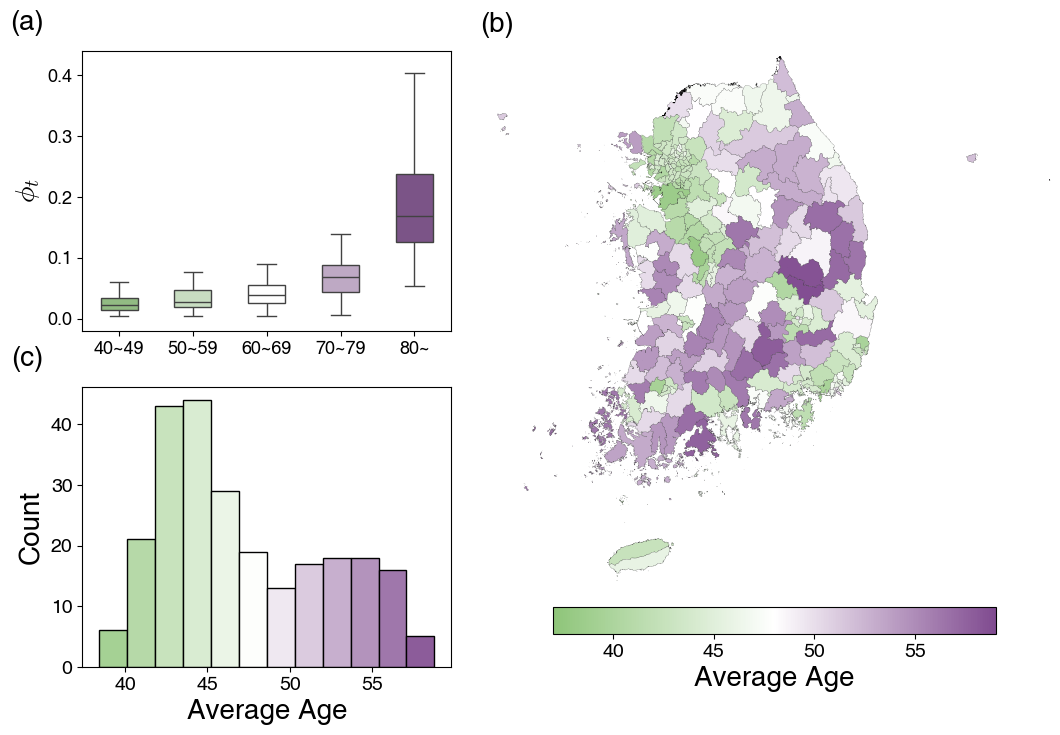

In [8]:
title_pos=[-0.15, 1.1]
title_size = 20
title_list = ['a', 'b', 'c', 'd', 'e','f','g','h','i']

# Figure 및 gridspec 생성
fig = plt.figure(figsize=(12.5, 8))
gs = GridSpec(2, 2, width_ratios=[2, 3], height_ratios=[1, 1], wspace=0.1, hspace=0.2)
# gs = GridSpec(2, 2, width_ratios=[2, 3], height_ratios=[1.2, 0.8], wspace=0.1, hspace=0.2)

# 데이터 로드
age_labels = ["40~49", "50~59", "60~69", "70~79", "80~"]
colors = ['#8ec579', '#c6e2bc', '#ffffff', '#c0a5c8', '#804b90']
path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(2022)+'_40.txt'
data = pd.read_csv(path, sep=',')

# phi_df 계산
N = data.iloc[:, 6:15].copy().mul(data['N'], axis=0)
D = data.iloc[:, 15:24].copy().mul(data['D'], axis=0)
phi_df = D.iloc[:, :] / N.iloc[:, :].values
phi_df.columns = phi_df.columns.str.slice(start=2)

# 리스트 만들기
age_list = []
age_label_list = []
phi_list = []
age_num_list = [45, 55, 65, 75, 85]
for i in range(5):
    age_list += [age_num_list[i]] * len(data)
    age_label_list += [age_labels[i]] * len(data)
    phi_list += list(phi_df[phi_df.columns[4:][i]])

# 메인 플롯
ax = fig.add_subplot(gs[0, 0])
sns.boxplot(x=age_label_list, y=phi_list, width=0.5, showfliers=False, palette=colors, ax=ax)
ax.set_ylim(-0.02, 0.44)
ax.set_ylabel(r'$\phi_t$', size=20)
# ax.set_xlabel(r'Age group', size=15)
ax.tick_params(axis='both', labelsize=13)
ax.text(title_pos[0], title_pos[1], '('+title_list[0]+')', fontsize=title_size,  ha='center', va='center',transform=ax.transAxes)

# 지도 그림 그리기 (2열을 합쳐서 배치)
ax_map = fig.add_subplot(gs[:, 1])  # 오른쪽 전체 차지
kr_sgg.plot(column='age', ec='k', cmap=cmap_age, legend=False, norm=norm_age, vmin=38, vmax=59, alpha=1, linewidth=0.1, ax=ax_map)
ax_map.set_xlim(kr_sgg.total_bounds[0], kr_sgg.total_bounds[2]+1000)
ax_map.set_ylim(kr_sgg.total_bounds[1], kr_sgg.total_bounds[3])
ax_map.axis('off')
pos = ax_map.get_position()  # 현재 위치 가져오기
ax_map.set_position([pos.x0, pos.y0 + 0.05, pos.width, pos.height])  # y0 값을 증가시켜 위로 올림
ax_map.text(title_pos[0]+0.15, title_pos[1]-0.04, '('+title_list[1]+')', fontsize=title_size,  ha='center', va='center',transform=ax_map.transAxes)
# Colorbar 생성 (아래쪽 가로 배치)
cbar_ax = inset_axes(ax_map, width='80%', height='5%', loc='lower center', bbox_to_anchor=(0, -0.1, 1, 1), bbox_transform=ax_map.transAxes, borderpad=0)
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm_age, cmap=cmap_age), cax=cbar_ax, orientation='horizontal')
cbar.set_label('Average Age', fontsize=20)
cbar.ax.tick_params(labelsize=14)  # 틱 라벨 크기 조정

# 인셋 플롯 생성 (왼쪽 아래에 배치)
inset_ax = fig.add_subplot(gs[1, 0])
counts, bins, patches = inset_ax.hist(age_data['average_age'], bins=12, ec='k')

# 각 막대의 색상 설정
for count, patch in zip(counts, patches):
    color = cmap_age(norm_age(patch.get_x() + patch.get_width() / 2))
    patch.set_facecolor(color)

inset_ax.set_xlabel('Average Age', size=20)
inset_ax.set_ylabel('Count', size=20)
inset_ax.tick_params(axis='x', labelsize=14)
inset_ax.tick_params(axis='y', labelsize=14)
inset_ax.text(title_pos[0], title_pos[1], '('+title_list[2]+')', fontsize=title_size,  ha='center', va='center',transform=inset_ax.transAxes)

plt.tight_layout()
# plt.savefig('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/figure/phi_age_map.png',dpi=300, transparent=True)
plt.show()

# Raw data properties (sido)

In [10]:
h_array=np.zeros([9,17])
N_array=np.zeros([9,17])
D_array=np.zeros([9,17])


h_data=pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/raw_data/2014_2022_sido_hospital.txt',sep='\t')
N_data=pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/raw_data/2014_2022_sido_10age_patients.txt',sep='\t')
D_data=pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/raw_data/2014_2022_sido_10age_fatalities.txt',sep='\t')
for y in range(2014,2023):
    year=str(y)#'2014'  
    h_array[y-2014]=h_data[year]
    N_array[y-2014]= N_data.groupby('sido', sort=False).sum()[year]
    D_array[y-2014]= D_data.groupby('sido', sort=False).sum()[year]

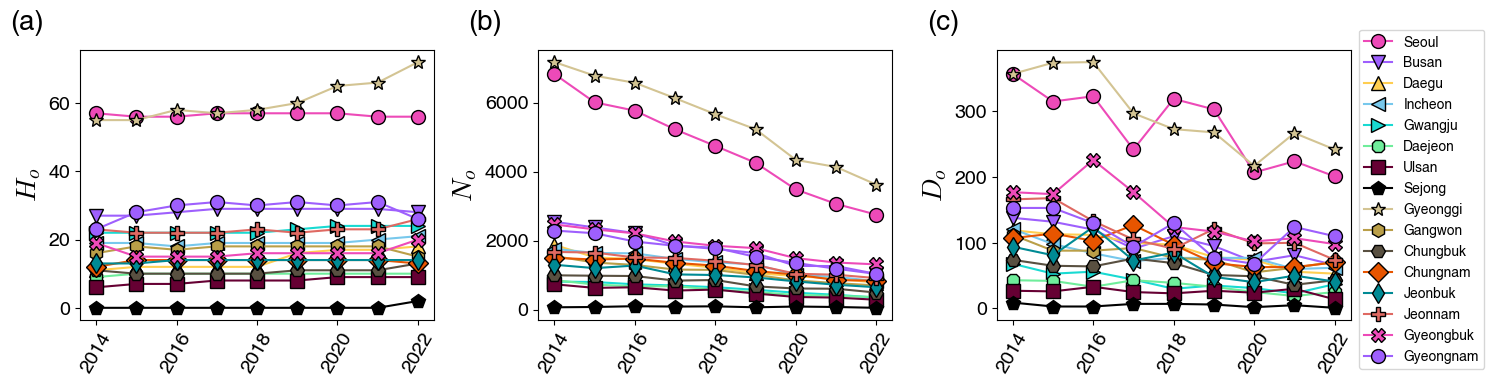

In [ ]:
title_pos=[-0.15, 1.1]
title_size = 20
title_list = ['a', 'b', 'c', 'd', 'e','f','g','h','i']
labelsize=20
ticksize=14
# Create the figure with gridspec
fig = plt.figure(figsize=(15, 4))
# Adjusting width_ratios and height_ratios
gs = GridSpec(1, 3, width_ratios=[5, 5, 5], height_ratios=[1])  # Reduce width for the first column

#00
ax00 = plt.subplot(gs[0,0])
si_list=list(h_data['sido'])
for c in range(16):
    ax00.plot(range(2014,2023),h_array[:,c], marker=mark[c],c=color_list[c],mec='k',ms=10,label=si_list[c])
ax00.set_ylabel('$H_o$',size=labelsize)
ax00.tick_params(axis='y', labelsize=ticksize)
ax00.tick_params(axis='x', labelsize=ticksize, rotation=60)
# ax00.set_xticks([])
ax00.text(title_pos[0], title_pos[1], '(a)', fontsize=20,  ha='center', va='center',transform=ax00.transAxes)

#10
ax10=plt.subplot(gs[0,1])
for c in range(16):
    ax10.plot(range(2014,2023),N_array[:,c], marker=mark[c],c=color_list[c],mec='k',ms=10,label=si_list[c])
ax10.set_ylabel('$N_o$',size=labelsize)
ax10.tick_params(axis='y', labelsize=ticksize)
ax10.tick_params(axis='x', labelsize=ticksize, rotation=60)
# ax10.set_xticks([])
ax10.text(title_pos[0], title_pos[1], '(b)', fontsize=20,  ha='center', va='center',transform=ax10.transAxes)

#20
ax20=plt.subplot(gs[0,2])
for c in range(16):
    ax20.plot(range(2014,2023),D_array[:,c], marker=mark[c],c=color_list[c],mec='k',ms=10,label=si_list[c])
ax20.text(title_pos[0], title_pos[1], '(c)', fontsize=20,  ha='center', va='center',transform=ax20.transAxes)
ax20.set_ylabel('$D_o$',size=labelsize)
ax20.tick_params(axis='y', labelsize=ticksize)
ax20.tick_params(axis='x',labelsize=ticksize,rotation=60)
ax20.legend(loc=(1.03,-0))
ax20.legend(loc='upper center', bbox_to_anchor=(1.2, 1.1), ncol=1)

plt.tight_layout()
# plt.savefig('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/figure/hND_sido_year.pdf', format='pdf', transparent=True)
plt.show()

In [5]:
D_data

,sido,age,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Seoul,0_9,0,0,0,0,0,0,0,0,0
1,Seoul,10_19,0,0,0,0,0,0,0,0,0
2,Seoul,20_29,1,2,1,1,1,0,1,1,0
3,Seoul,30_39,9,6,8,4,0,2,1,1,0
4,Seoul,40_49,22,20,20,14,10,8,8,10,7
...,...,...,...,...,...,...,...,...,...,...,...
148,Jeju,40_49,1,1,0,1,0,0,2,0,1
149,Jeju,50_59,2,1,0,2,2,0,1,2,2
150,Jeju,60_69,4,1,1,2,0,2,1,2,1
151,Jeju,70_79,2,7,1,0,1,4,5,2,5


In [7]:
N_array[y-2014]= N_data.groupby('sido').sum()[year]

In [9]:
N_data.groupby('sido').sum()

,age,2014,2015,2016,2017,2018,2019,2020,2021,2022
sido,,,,,,,,,,
Busan,0_910_1920_2930_3940_4950_5960_6970_7980_,2548,2386,2221,1861,1764,1642,1270,1266,1038
Chungbuk,0_910_1920_2930_3940_4950_5960_6970_7980_,998,986,977,844,862,677,616,609,498
Chungnam,0_910_1920_2930_3940_4950_5960_6970_7980_,1506,1455,1483,1359,1278,1122,1019,860,842
Daegu,0_910_1920_2930_3940_4950_5960_6970_7980_,1881,1518,1466,1333,1219,1061,977,898,787
Daejeon,0_910_1920_2930_3940_4950_5960_6970_7980_,859,730,677,681,583,515,426,404,368
Gangwon,0_910_1920_2930_3940_4950_5960_6970_7980_,1555,1368,1298,1165,1154,1010,850,771,704
Gwangju,0_910_1920_2930_3940_4950_5960_6970_7980_,817,803,737,703,653,578,493,434,352
Gyeongbuk,0_910_1920_2930_3940_4950_5960_6970_7980_,2472,2329,2214,1978,1854,1786,1495,1368,1315
Gyeonggi,0_910_1920_2930_3940_4950_5960_6970_7980_,7177,6782,6577,6130,5666,5231,4343,4137,3626


# Rate $N$ and $D$

In [21]:
RNRD_data = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/raw_data/2022_RNRD.txt', sep='\t')

In [22]:
RNRD_data

,sido,sigungu,h,A,N,D,RN0_9,RN10_19,RN20_29,RN30_39,...,RN80_,RD0_9,RD10_19,RD20_29,RD30_39,RD40_49,RD50_59,RD60_69,RD70_79,RD80_
0,Seoul,강남구,3,39.501308,71,6,0.000363,0.011248,0.057692,0.082729,...,0.201742,0.0,0.0,0.0,0.000000,0.034826,0.084577,0.129353,0.189055,0.562189
1,Seoul,강동구,3,24.589280,126,6,0.000363,0.011248,0.057692,0.082729,...,0.201742,0.0,0.0,0.0,0.000000,0.034826,0.084577,0.129353,0.189055,0.562189
2,Seoul,강북구,1,23.596920,98,12,0.000363,0.011248,0.057692,0.082729,...,0.201742,0.0,0.0,0.0,0.000000,0.034826,0.084577,0.129353,0.189055,0.562189
3,Seoul,강서구,4,41.436729,167,12,0.000363,0.011248,0.057692,0.082729,...,0.201742,0.0,0.0,0.0,0.000000,0.034826,0.084577,0.129353,0.189055,0.562189
4,Seoul,관악구,1,29.568727,152,5,0.000363,0.011248,0.057692,0.082729,...,0.201742,0.0,0.0,0.0,0.000000,0.034826,0.084577,0.129353,0.189055,0.562189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,Gyeongnam,함안군,0,416.598222,37,5,0.001925,0.009625,0.034649,0.049086,...,0.262753,0.0,0.0,0.0,0.009091,0.009091,0.090909,0.109091,0.172727,0.609091
224,Gyeongnam,함양군,0,725.484452,19,3,0.001925,0.009625,0.034649,0.049086,...,0.262753,0.0,0.0,0.0,0.009091,0.009091,0.090909,0.109091,0.172727,0.609091
225,Gyeongnam,합천군,0,983.463996,29,6,0.001925,0.009625,0.034649,0.049086,...,0.262753,0.0,0.0,0.0,0.009091,0.009091,0.090909,0.109091,0.172727,0.609091
226,Jeju,제주시,5,978.426995,149,12,0.000000,0.015306,0.020408,0.086735,...,0.178571,0.0,0.0,0.0,0.000000,0.066667,0.133333,0.066667,0.333333,0.400000


In [66]:
cols = ['sido'] + [col for col in RNRD_data.columns if col.startswith('RN') or col.startswith('RD')]
RNRD = RNRD_data[cols].drop_duplicates(subset=['sido'], keep='first').reset_index(drop=True)
age_seq_data = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/dataset/tuberculosis/data/age_sequence_2022.csv',sep=',')
age_list=['0~9', '10~19', '20~29', '30~39', '40~49', '50~59','60~69','70~79','80~']
sido_list = list(age_seq_data['sigungu'])
sido_list.remove('Sejong')

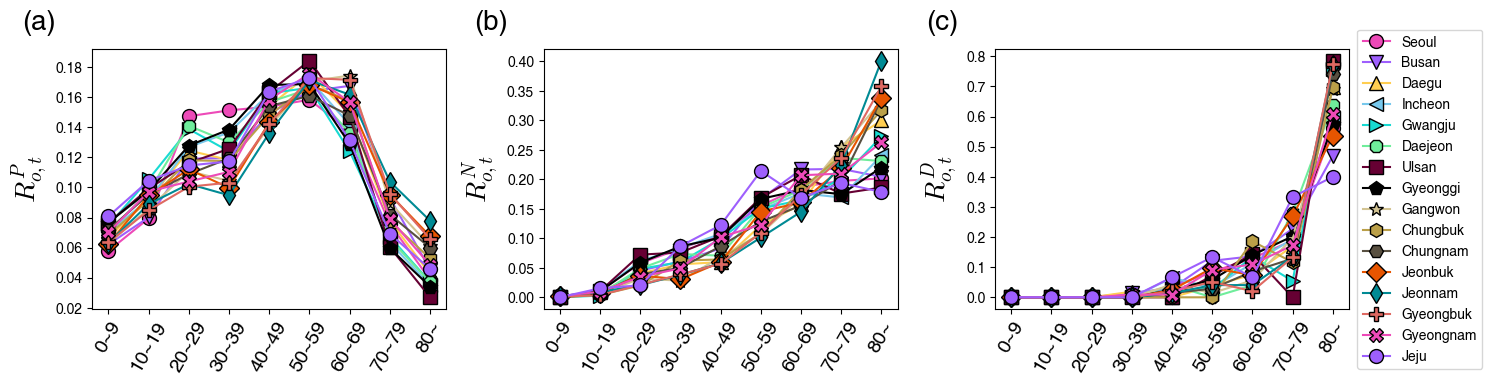

In [69]:
fig = plt.figure(figsize=(15, 4))
gs = GridSpec(1, 3, width_ratios=[1, 1, 1], height_ratios=[1])  
ax1 = plt.subplot(gs[0,0])
c=0
for l,e in age_seq_data.iloc[:,1:10].iterrows():
	if l!=7:
		ax1.plot(age_list, e/sum(e), marker=mark[c],c=color_list[c],mec='k',ms=10,label=sido_list[c])
		c+=1
ax1.set_ylabel(r'$R^P_{o,t}$',size=20)
ax1.tick_params(axis='x',labelsize=14,rotation=60)
ax1.text(title_pos[0], title_pos[1], '(a)', fontsize=20,  ha='center', va='center',transform=ax1.transAxes)

c=0
ax2 = plt.subplot(gs[0,1])
for l,e in RNRD.iloc[:,1:10].iterrows():
	ax2.plot(age_list, e, marker=mark[c],c=color_list[c],mec='k',ms=10,label=sido_list[c])
	c+=1
ax2.set_ylabel(r'$R^N_{o,t}$',size=20)
ax2.tick_params(axis='x',labelsize=14,rotation=60)
ax2.text(title_pos[0], title_pos[1], '(b)', fontsize=20,  ha='center', va='center',transform=ax2.transAxes)

c=0
ax3 = plt.subplot(gs[0,2])
for l,e in RNRD.iloc[:,10:20].iterrows():
	ax3.plot(age_list, e, marker=mark[c],c=color_list[c],mec='k',ms=10,label=sido_list[c])
	c+=1
ax3.set_ylabel(r'$R^D_{o,t}$',size=20)
ax3.tick_params(axis='x',labelsize=14,rotation=60)
ax3.text(title_pos[0], title_pos[1], '(c)', fontsize=20,  ha='center', va='center',transform=ax3.transAxes)
ax3.legend(loc=(1.03,-0))
ax3.legend(loc='upper center', bbox_to_anchor=(1.2, 1.1), ncol=1)
plt.tight_layout()
# plt.savefig('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/figure/RPRNRD.pdf', format='pdf', transparent=True)
plt.show()


# a=0 & a=-0.1 MAP

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from scipy import stats
def rgb_to_hex(r, g, b):
    r, g, b = int(r), int(g), int(b)
    return '#' + hex(r)[2:].zfill(2) + hex(g)[2:].zfill(2) + hex(b)[2:].zfill(2)
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.gridspec import GridSpec

# colors_p = [rgb_to_hex(255,255,255),rgb_to_hex(255,255,255),rgb_to_hex(255,255,255),'#BD66A7','#BD66A7','#BDBDBD','#2D7811']
colors_p = ['#BD66A7','#BDBDBD','#2D7811']
cmap_p = LinearSegmentedColormap.from_list('my_cmap', colors_p, gamma=1)

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'Helvetica'

In [2]:
# geopandas 맵 데이터 불러오기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 현상
# plt.rcParams['font.family'] = 'NamuBaraunGothic' # 한글폰트 전역 설정
path = '/home/users/YongsungKwon/workplace/Yongpyter/dataset/tuberculosis/data/'
kr_sgg = gpd.read_file(path+'korea_map/korea_sigungu/',encoding='cp949')
# kr_sido = kr_sido.drop(7)
kr_sgg = kr_sgg.reset_index()

In [3]:
sido_cd=pd.read_csv(path+'korea_map/sido_code.csv')

In [4]:
kr_sido = gpd.read_file(path+'korea_map/TL_SCCO_CTPRVN',encoding='cp949')
kr_sido = kr_sido.reset_index()

In [5]:
def search_sido(id):
    # sc=kr_sgg['SIG_CD'][id][:2]
    sc=id[:2]
    # print(sc)
    return list(sido_cd[sido_cd['cd']==int(sc)]['sido'])[0]

def E(data_, h_pd=None, a=None, b=None):
	if isinstance(h_pd, pd.DataFrame): 
		eta = h_pd['h'] / data_['A']
	else: 
		eta = data_['h'] / data_['A']
	if a is None: 
		a, b = 0, 1

	E = pd.Series(0, index=data_.index)  # 각 row별로 저장할 E를 Series로 초기화

	t = [45, 55, 65, 75, 85]
	age = ['40_49', '50_59', '60_69', '70_79', '80_']

	for i in range(5):
		phi_t = np.exp(-eta / data_['eta_tilde' + age[i]])
		N_t = data_['RN' + age[i]] * data_['N']
		E += (a * t[i] + b) * N_t * phi_t  # row-wise 연산

	return E  # 각 row별 E 값이 담긴 Series 반환


def b(data_, a):
	atNp, E_0 = 0,0
	eta = data_['h']/data_['A']
	t = [45, 55, 65, 75, 85]
	age = ['40_49', '50_59', '60_69', '70_79', '80_']
	for i in range(5): 
		E_0 += sum(data_['RD'+age[i]]*data_['D'])
		phi_t = np.exp(-eta/data_['eta_tilde'+age[i]])
		N_t = data_['RN'+age[i]]*data_['N']
		atNp += sum( a*t[i]*N_t*phi_t)
	return (E_0-atNp)/E_0 # b

In [6]:
year= 2022
i_0=15
i_01=5
i_005=10
path='/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/'
data = pd.read_csv(path+'data_over40/'+str(year)+'_40.txt',sep=',')
a_0 = np.linspace(-0.15, 0.05, 21)[i_0]
a_01 = np.linspace(-0.15, 0.05, 21)[i_01]
a_005 = np.linspace(-0.15, 0.05, 21)[i_005]
h_opt_0 = pd.read_csv(path+'at_b/opt_E_h_a015_005/'+str(year)+'MC_age_h_opt_a_'+str(i_0)+'.csv')
h_opt_01 = pd.read_csv(path+'at_b/opt_E_h_a015_005/'+str(year)+'MC_age_h_opt_a_'+str(i_01)+'.csv')
h_opt_005 = pd.read_csv(path+'at_b/opt_E_h_a015_005/'+str(year)+'MC_age_h_opt_a_'+str(i_005)+'.csv')
b_0=b(data,a_0)
b_01=b(data,a_01)
b_005=b(data,a_005)

data['h_opt_0'] = h_opt_0
data['h_opt_01'] = h_opt_01
data['h_opt_005'] = h_opt_005

data['E_opt_0'] = E(data,h_pd=h_opt_0,a=a_0,b=b_0)
data['E_opt_01'] = E(data,h_pd=h_opt_01,a=a_01,b=b_01)
data['E_opt_005'] = E(data,h_pd=h_opt_005,a=a_005,b=b_005)

### map

In [7]:
# geopandas 맵 데이터 불러오기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 현상
# plt.rcParams['font.family'] = 'NamuBaraunGothic' # 한글폰트 전역 설정
map_path='/home/users/YongsungKwon/workplace/Yongpyter/dataset/tuberculosis/data/'
kr_sgg = gpd.read_file(map_path+'korea_map/korea_sigungu/',encoding='cp949')
# kr_sido = kr_sido.drop(7)
kr_sgg = kr_sgg.reset_index()

In [8]:
concat_h_01 = []
concat_h_0 = []
concat_E_01 = []
concat_E_0 = []
concat_E_01nd=[]
concat_h_01nd=[]

for l, e in kr_sgg.iterrows():
	sido = search_sido(e['SIG_CD'])
	sigungu = e['SIG_KOR_NM']

	if len(sigungu) >= 5:
		sigungu = sigungu[:3]

	# data 필터링
	dt = data[(data['sido'] == sido) & (data['sigungu'] == sigungu)]

	# 필터링 후 데이터가 없을 경우 NaN 추가
	if dt.empty:
		concat_h_01.append(np.nan)
		concat_h_0.append(np.nan)
		concat_E_01.append(np.nan)
		concat_E_0.append(np.nan)
		concat_E_01nd.append(np.nan)
		concat_h_01nd.append(np.nan)
		

	else:
		# 데이터가 존재할 경우 연산 수행
		dE_01 = dt['E_opt_01'].iloc[0] - dt['E_opt_0'].iloc[0]
		dE_0 = dt['E_opt_0'].iloc[0] - dt['D'].iloc[0]
		dh_01 = dt['h_opt_01'].iloc[0] - dt['h_opt_0'].iloc[0]
		dh_0 =  dt['h_opt_0'].iloc[0] - dt['h'].iloc[0]
		dE_01nd = dt['E_opt_01'].iloc[0] - dt['D'].iloc[0]
		dh_01nd =  dt['h_opt_01'].iloc[0] - dt['h'].iloc[0]

		concat_h_01.append(dh_01)
		concat_h_0.append(dh_0)
		concat_E_01.append(dE_01)
		concat_E_0.append(dE_0)
		concat_E_01nd.append(dE_01nd)
		concat_h_01nd.append(dh_01nd)

# 결과를 kr_sgg에 추가
kr_sgg['h_opt_01'] = concat_h_01
kr_sgg['h_opt_0'] = concat_h_0
kr_sgg['E_opt_01'] = concat_E_01
kr_sgg['E_opt_0'] = concat_E_0
kr_sgg['E_opt_01nd'] = concat_E_01nd
kr_sgg['h_opt_01nd'] = concat_h_01nd


/miniconda3/envs/YongsungKwon_env_py310/lib/python3.10/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/miniconda3/envs/YongsungKwon_env_py310/lib/python3.10/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/miniconda3/envs/YongsungKwon_env_py310/lib/python3.10/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/miniconda3/envs/YongsungKwon_env_py310/lib/python3.10/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/miniconda3/envs/YongsungKwon_env_py310/lib/python3.10/sit

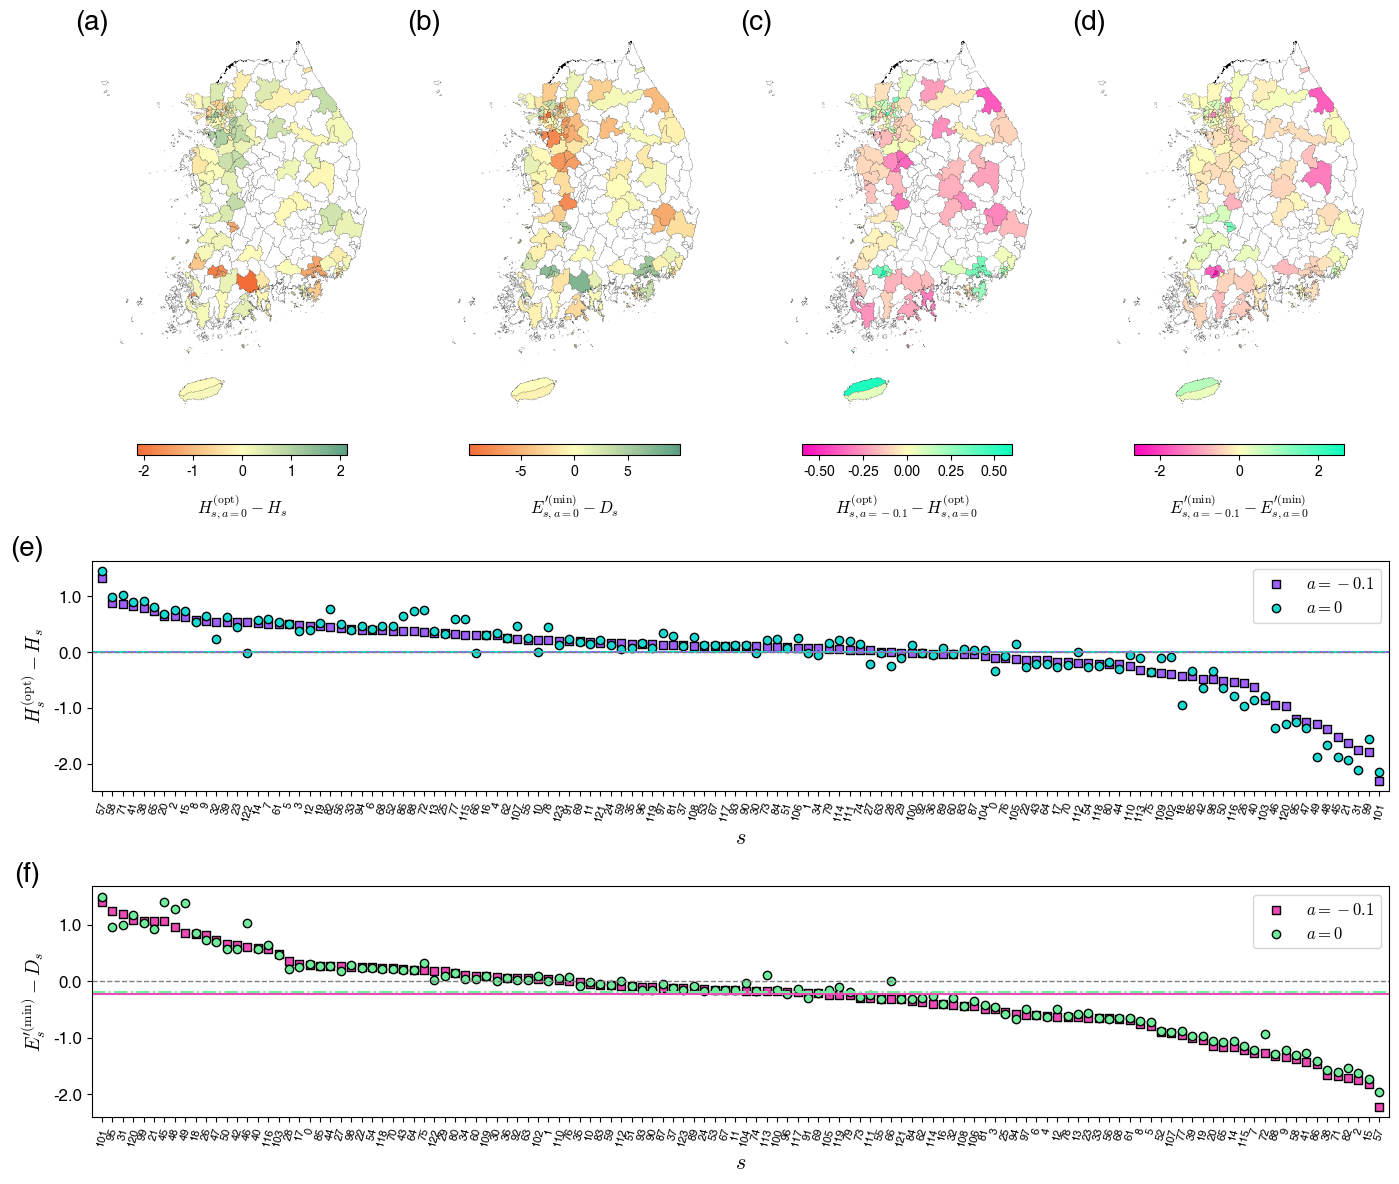

In [9]:
fig = plt.figure(figsize=[14, 12])  # Adjust figure size

gs = GridSpec(3, 4, figure=fig, height_ratios=[2, 1, 1])  # First row for maps, second row for scatter plot

title_pos = [-0., 1.]
title_size = 20

colors_0 = ['#FFFFFF']
cmap_0 = LinearSegmentedColormap.from_list('zero_cmap', colors_0, gamma=1)
norm_0 = mpl.colors.Normalize(vmin=0, vmax=0.1)

color_map1 = ['#F26E36', '#FFFEBD', '#5A9F84']
cmap_1 = LinearSegmentedColormap.from_list('my_cmap1', color_map1, gamma=1)

color_map2 = ['#FF04BD', '#FFFEBD', '#09FEBD']
cmap_2 = LinearSegmentedColormap.from_list('my_cmap2', color_map2, gamma=1)

# First row: 4 maps
map_columns = ['h_opt_0', 'E_opt_0', 'h_opt_01', 'E_opt_01']
cmap_list = [cmap_1, cmap_1, cmap_2, cmap_2]
labels = [
    r'$H^\mathrm{(opt)}_{s,a=0} - H_s$',
    r'$E^{\prime\mathrm{(min)}}_{s,a=0} - D_s$',
    r'$H^\mathrm{(opt)}_{s,a=-0.1} - H^\mathrm{(opt)}_{s,a=0}$',
    r'$E^{\prime\mathrm{(min)}}_{s,a=-0.1} - E^{\prime\mathrm{(min)}}_{s,a=0}$'
]
titles = ['(a)', '(b)', '(c)', '(d)']

for i, (col, cmap, label, title) in enumerate(zip(map_columns, cmap_list, labels, titles)):
	ax = fig.add_subplot(gs[0, i])
	norm = Normalize(vmin=-max(np.abs(kr_sgg[col])), vmax=max(np.abs(kr_sgg[col])))
	kr_sgg[kr_sgg[col] != 0].plot(column=col, ax=ax, cmap=cmap, ec='k', norm=norm, legend=False, 
	                             vmin=-max(np.abs(kr_sgg[col])), vmax=max(np.abs(kr_sgg[col])), alpha=1, linewidth=0.1)
	kr_sgg[kr_sgg[col].isna()].plot(column=col, ax=ax, ec='k', color='#FFFFFF', alpha=1, linewidth=0.1)
	ax.set_xlim(0.73e6, 1.23e6)
	ax.axis(False)
	cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), ax=ax, orientation='horizontal', fraction=0.046, pad=0.04, shrink=0.7)
	cbar.set_label(label, labelpad=10, fontsize=12)
	ax.text(title_pos[0], title_pos[1], title, fontsize=title_size, ha='center', va='center', transform=ax.transAxes)

# Second row: Scatter plot
ax5 = fig.add_subplot(gs[1, :])
data['diff_h_opt_01'] = data['h_opt_01'] - data['h']
data['diff_h_opt_0'] = data['h_opt_0'] - data['h']

sorted_data = data.sort_values(by='diff_h_opt_01', ascending=False).reset_index()

ax5.scatter(range(len(sorted_data)), sorted_data['diff_h_opt_01'], label=r'$a=-0.1$', ec='k', c='#9E5FFD', marker='s')
ax5.axhline(np.mean(sorted_data['diff_h_opt_01']), color='#9E5FFD', linestyle='-', linewidth=1.5)
ax5.scatter(range(len(sorted_data)), sorted_data['diff_h_opt_0'], label=r'$a=0$', ec='k', c='#18DAD2')
ax5.axhline(np.mean(sorted_data['diff_h_opt_0']), color='#18DAD2', linestyle='-.', linewidth=1.5)
ax5.axhline(0, color='gray', linestyle='--', linewidth=1)
ax5.set_xticks(range(len(sorted_data)))
ax5.set_xticklabels(sorted_data['index'], rotation=75, fontsize=8)
ax5.set_yticklabels(ax5.get_yticks(), fontsize=12)
ax5.set_ylabel(r'$H^\mathrm{(opt)}_s - H_s$', size=14)
ax5.set_xlabel(r'$s$', size=16)
ax5.legend(fontsize='large')
ax5.set_xlim(-1, len(sorted_data))
ax5.text(-0.05, 1.05, '(e)', fontsize=title_size, ha='center', va='center', transform=ax5.transAxes)

# Second row: Scatter plot
ax6 = fig.add_subplot(gs[2, :])
data['diff_E_opt_01'] = data['E_opt_01'] - data['D']
data['diff_E_opt_0'] = data['E_opt_0'] - data['D']

sorted_data = data.sort_values(by='diff_E_opt_01', ascending=False).reset_index()

ax6.scatter(range(len(sorted_data)), sorted_data['diff_E_opt_01'], label=r'$a=-0.1$', ec='k', c=rgb_to_hex(237,74,184), marker='s')
ax6.axhline(np.mean(sorted_data['diff_E_opt_01']), color=rgb_to_hex(237,74,184), linestyle='-', linewidth=1.5)
ax6.scatter(range(len(sorted_data)), sorted_data['diff_E_opt_0'], label=r'$a=0$', ec='k', c=rgb_to_hex(111,237,155))
ax6.axhline(np.mean(sorted_data['diff_E_opt_0']), color=rgb_to_hex(111,237,155), linestyle='-.', linewidth=1.5)
ax6.axhline(0, color='gray', linestyle='--', linewidth=1)
ax6.set_xticks(range(len(sorted_data)))
ax6.set_xticklabels(sorted_data['index'], rotation=75, fontsize=8)
ax6.set_yticklabels(ax5.get_yticks(), fontsize=12)
ax6.set_ylabel(r'$E^{\prime\mathrm{(min)}}_s - D_s$', size=14)
ax6.set_xlabel(r'$s$', size=16)
ax6.legend(fontsize='large')
ax6.set_xlim(-1, len(sorted_data))
ax6.text(-0.05, 1.05, '(f)', fontsize=title_size, ha='center', va='center', transform=ax6.transAxes)

plt.tight_layout()
# plt.savefig('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/figure/dh_dE_scatter.png',dpi=300, transparent=True)
plt.show()


/miniconda3/envs/YongsungKwon_env_py310/lib/python3.10/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/miniconda3/envs/YongsungKwon_env_py310/lib/python3.10/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/miniconda3/envs/YongsungKwon_env_py310/lib/python3.10/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/miniconda3/envs/YongsungKwon_env_py310/lib/python3.10/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/miniconda3/envs/YongsungKwon_env_py310/lib/python3.10/sit

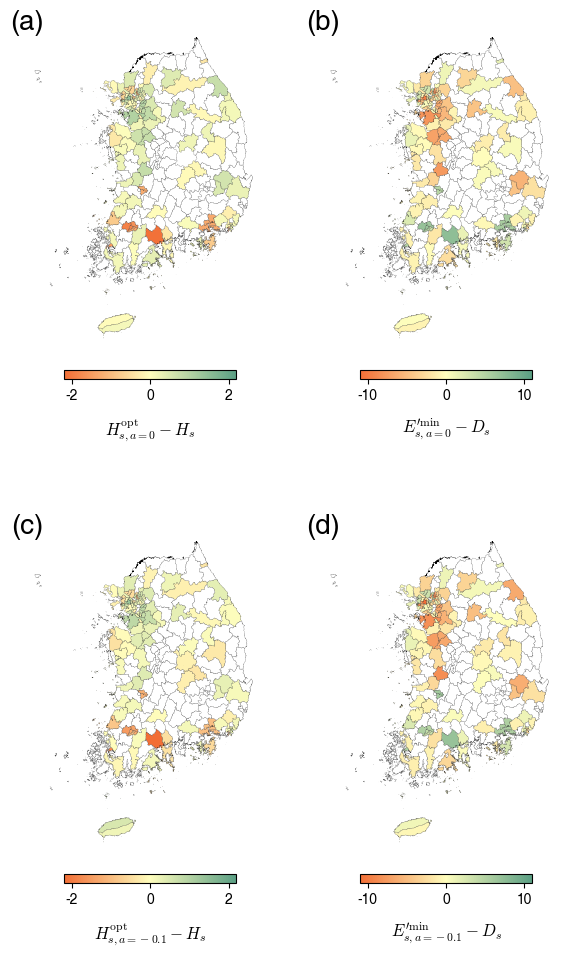

In [10]:
fig = plt.figure(figsize=[7, 12])  # Adjust figure size

gs = GridSpec(2, 2, figure=fig, height_ratios=[1, 1])  # First row for maps, second row for scatter plot

title_pos = [-0., 1.]
title_size = 20

colors_0 = ['#FFFFFF']
cmap_0 = LinearSegmentedColormap.from_list('zero_cmap', colors_0, gamma=1)
norm_0 = mpl.colors.Normalize(vmin=0, vmax=0.1)

color_map1 = ['#F26E36', '#FFFEBD', '#5A9F84']
cmap_1 = LinearSegmentedColormap.from_list('my_cmap1', color_map1, gamma=1)

color_map2 = ['#FF04BD', '#FFFEBD', '#09FEBD']
cmap_2 = LinearSegmentedColormap.from_list('my_cmap2', color_map2, gamma=1)

# First row: 4 maps
map_columns = ['h_opt_0', 'E_opt_0', 'h_opt_01nd', 'E_opt_01nd']
cmap_list = [cmap_1, cmap_1, cmap_1, cmap_1]
labels = [
    r'$H^\mathrm{opt}_{s,a=0} - H_s$',
    r'$E^{\prime\mathrm{min}}_{s,a=0} - D_s$',
    r'$H^\mathrm{opt}_{s,a=-0.1} - H_s$',
    r'$E^{\prime\mathrm{min}}_{s,a=-0.1} - D_s$'
]
titles = ['(a)', '(b)', '(c)', '(d)']
vrange=[2.2,11,2.2,11]

for i, (col, cmap, label, title) in enumerate(zip(map_columns, cmap_list, labels, titles)):
	ax = fig.add_subplot(gs[i//2, i%2])
	norm = Normalize(vmin=-vrange[i], vmax=vrange[i])
	kr_sgg[kr_sgg[col] != 0].plot(column=col, ax=ax, cmap=cmap, ec='k', norm=norm, legend=False, 
	                             vmin=-vrange[i], vmax=vrange[i], alpha=1, linewidth=0.1)
	kr_sgg[kr_sgg[col].isna()].plot(column=col, ax=ax, ec='k', color='#FFFFFF', alpha=1, linewidth=0.1)
	ax.set_xlim(0.73e6, 1.23e6)
	ax.axis(False)
	cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), ax=ax, orientation='horizontal', fraction=0.046, pad=0.04, shrink=0.7)
	cbar.set_label(label, labelpad=10, fontsize=12)
	ax.text(title_pos[0], title_pos[1], title, fontsize=title_size, ha='center', va='center', transform=ax.transAxes)

# a=-0.05 & a=0.03 COMPARISON (2022)

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from scipy import stats
def rgb_to_hex(r, g, b):
    r, g, b = int(r), int(g), int(b)
    return '#' + hex(r)[2:].zfill(2) + hex(g)[2:].zfill(2) + hex(b)[2:].zfill(2)
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.gridspec import GridSpec
from matplotlib.cm import ScalarMappable
import matplotlib.cm as cm
import matplotlib.colors as mcolors
# colors_p = [rgb_to_hex(255,255,255),rgb_to_hex(255,255,255),rgb_to_hex(255,255,255),'#BD66A7','#BD66A7','#BDBDBD','#2D7811']
colors_p = ['#BD66A7','#BDBDBD','#2D7811']
cmap_p = LinearSegmentedColormap.from_list('my_cmap', colors_p, gamma=1)

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'Helvetica'

In [18]:
# geopandas 맵 데이터 불러오기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 현상
# plt.rcParams['font.family'] = 'NamuBaraunGothic' # 한글폰트 전역 설정
path = '/home/users/YongsungKwon/workplace/Yongpyter/dataset/tuberculosis/data/'
kr_sgg = gpd.read_file(path+'korea_map/korea_sigungu/',encoding='cp949')
# kr_sido = kr_sido.drop(7)
kr_sgg = kr_sgg.reset_index()

In [19]:
sido_cd=pd.read_csv(path+'korea_map/sido_code.csv')

In [20]:
kr_sido = gpd.read_file(path+'korea_map/TL_SCCO_CTPRVN',encoding='cp949')
kr_sido = kr_sido.reset_index()

In [21]:
def search_sido(id):
    # sc=kr_sgg['SIG_CD'][id][:2]
    sc=id[:2]
    # print(sc)
    return list(sido_cd[sido_cd['cd']==int(sc)]['sido'])[0]

def E(data_, h_pd=None, a=None, b=None):
	if isinstance(h_pd, pd.DataFrame): 
		eta = h_pd['h'] / data_['A']
	else: 
		eta = data_['h'] / data_['A']
	if a is None: 
		a, b = 0, 1

	E = pd.Series(0, index=data_.index)  # 각 row별로 저장할 E를 Series로 초기화

	t = [45, 55, 65, 75, 85]
	age = ['40_49', '50_59', '60_69', '70_79', '80_']

	for i in range(5):
		phi_t = np.exp(-eta / data_['eta_tilde' + age[i]])
		N_t = data_['RN' + age[i]] * data_['N']
		E += (a * t[i] + b) * N_t * phi_t  # row-wise 연산

	return E  # 각 row별 E 값이 담긴 Series 반환


def b(data_, a):
	atNp, E_0 = 0,0
	eta = data_['h']/data_['A']
	t = [45, 55, 65, 75, 85]
	age = ['40_49', '50_59', '60_69', '70_79', '80_']
	for i in range(5): 
		E_0 += sum(data_['RD'+age[i]]*data_['D'])
		phi_t = np.exp(-eta/data_['eta_tilde'+age[i]])
		N_t = data_['RN'+age[i]]*data_['N']
		atNp += sum( a*t[i]*N_t*phi_t)
	return (E_0-atNp)/E_0 # b

In [22]:
year= 2022
i_0=15# a=0
i_005_=14#10 a=-0.01
i_005=18#20 a=0.03
path='/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/'
data = pd.read_csv(path+'data_over40/'+str(year)+'_40.txt',sep=',')
a_0 = np.linspace(-0.15, 0.05, 21)[i_0]
a_005_ = np.linspace(-0.15, 0.05, 21)[i_005_]
a_005 = np.linspace(-0.15, 0.05, 21)[i_005]
h_opt_0 = pd.read_csv(path+'at_b/opt_E_h_a015_005/'+str(year)+'MC_age_h_opt_a_'+str(i_0)+'.csv')
h_opt_005_ = pd.read_csv(path+'at_b/opt_E_h_a015_005/'+str(year)+'MC_age_h_opt_a_'+str(i_005_)+'.csv')
h_opt_005 = pd.read_csv(path+'at_b/opt_E_h_a015_005/'+str(year)+'MC_age_h_opt_a_'+str(i_005)+'.csv')
b_0=b(data,a_0)
b_005_=b(data,a_005_)
b_005=b(data,a_005)

data['h_opt_0'] = h_opt_0
data['h_opt_005_'] = h_opt_005_
data['h_opt_005'] = h_opt_005

data['E_opt_0'] = E(data,h_pd=h_opt_0,a=a_0,b=b_0)
data['E_opt_005_'] = E(data,h_pd=h_opt_005_,a=a_005_,b=b_005_)
data['E_opt_005'] = E(data,h_pd=h_opt_005,a=a_005,b=b_005)

In [23]:
print(sum(data['E_opt_0']))
print(sum(data['E_opt_005_']))
print(sum(data['E_opt_005']))

767.535512551346
766.6582746873462
766.8559225409463


### map

In [24]:
# geopandas 맵 데이터 불러오기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 현상
# plt.rcParams['font.family'] = 'NamuBaraunGothic' # 한글폰트 전역 설정
map_path='/home/users/YongsungKwon/workplace/Yongpyter/dataset/tuberculosis/data/'
kr_sgg = gpd.read_file(map_path+'korea_map/korea_sigungu/',encoding='cp949')
# kr_sido = kr_sido.drop(7)
kr_sgg = kr_sgg.reset_index()

In [25]:
concat_h_0 = []
concat_h_005_ = []
concat_h_005 = []
concat_E_0 = []
concat_E_005_=[]
concat_E_005=[]

oncat_h_005_d = []
concat_h_005d = []
concat_E_005_d = []
concat_E_005d=[]

for l, e in kr_sgg.iterrows():
	sido = search_sido(e['SIG_CD'])
	sigungu = e['SIG_KOR_NM']

	if len(sigungu) >= 5:
		sigungu = sigungu[:3]

	# data 필터링
	dt = data[(data['sido'] == sido) & (data['sigungu'] == sigungu)]

	# 필터링 후 데이터가 없을 경우 NaN 추가
	if dt.empty:
		concat_h_0.append(np.nan)
		concat_h_005_.append(np.nan)
		concat_h_005.append(np.nan)
		concat_E_0.append(np.nan)
		concat_E_005_.append(np.nan)
		concat_E_005.append(np.nan)
		oncat_h_005_d.append(np.nan)
		concat_h_005d.append(np.nan)
		concat_E_005_d.append(np.nan)
		concat_E_005d.append(np.nan)

	else:
		# 데이터가 존재할 경우 연산 수행
		dh_005_ = dt['h_opt_005_'].iloc[0] - dt['h_opt_0'].iloc[0]
		dh_005 = dt['h_opt_005'].iloc[0] - dt['h_opt_0'].iloc[0]
		dE_005_ = dt['E_opt_005_'].iloc[0] - dt['E_opt_0'].iloc[0]
		dE_005 = dt['E_opt_005'].iloc[0] - dt['E_opt_0'].iloc[0]

		concat_h_0.append(dt['h_opt_0'].iloc[0] - dt['h'].iloc[0])
		concat_h_005_.append(dt['h_opt_005_'].iloc[0]- dt['h'].iloc[0])
		concat_h_005.append(dt['h_opt_0'].iloc[0]- dt['h'].iloc[0])
		concat_E_0.append(dt['E_opt_0'].iloc[0]- dt['D'].iloc[0])
		concat_E_005_.append(dt['E_opt_005_'].iloc[0]- dt['D'].iloc[0])
		concat_E_005.append(dt['E_opt_005'].iloc[0]- dt['D'].iloc[0])

		oncat_h_005_d.append(dh_005_)
		concat_h_005d.append(dh_005)
		concat_E_005_d.append(dE_005_)
		concat_E_005d.append(dE_005)

# 결과를 kr_sgg에 추가
kr_sgg['h_0'] = concat_h_0
kr_sgg['h_005_'] = concat_h_005_ 
kr_sgg['h_005'] = concat_h_005 
kr_sgg['E_0'] = concat_E_0 
kr_sgg['E_005_'] = concat_E_005_
kr_sgg['E_005'] = concat_E_005

kr_sgg['h_005_d'] = oncat_h_005_d 
kr_sgg['h_005d'] = concat_h_005d 
kr_sgg['E_005_d'] = concat_E_005_d 
kr_sgg['E_005d'] = concat_E_005d

/miniconda3/envs/YongsungKwon_env_py310/lib/python3.10/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/miniconda3/envs/YongsungKwon_env_py310/lib/python3.10/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/miniconda3/envs/YongsungKwon_env_py310/lib/python3.10/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/miniconda3/envs/YongsungKwon_env_py310/lib/python3.10/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/miniconda3/envs/YongsungKwon_env_py310/lib/python3.10/sit

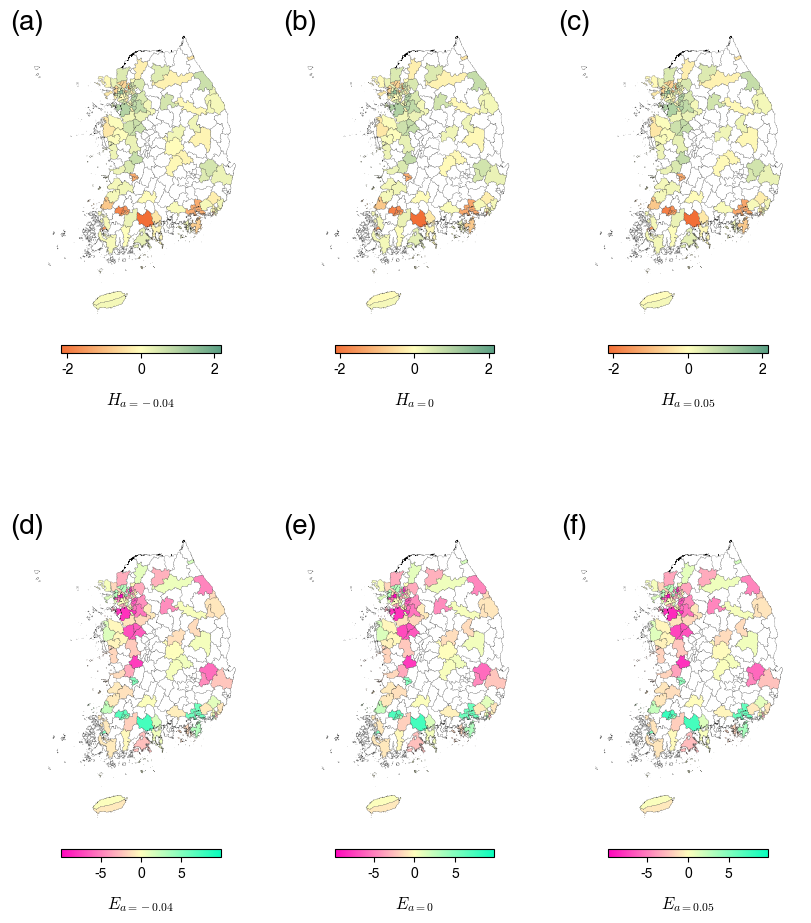

In [26]:
fig = plt.figure(figsize=[10,12])
gs = GridSpec(2, 3, figure=fig, height_ratios=[1, 1])

title_pos = [-0., 1.]
title_size = 20

colors_0 = ['#FFFFFF']
cmap_0 = LinearSegmentedColormap.from_list('zero_cmap', colors_0, gamma=1)
norm_0 = mpl.colors.Normalize(vmin=0, vmax=0.1)

color_map1 = ['#F26E36', '#FFFEBD', '#5A9F84']
cmap_1 = LinearSegmentedColormap.from_list('my_cmap1', color_map1, gamma=1)

color_map2 = ['#FF04BD', '#FFFEBD', '#09FEBD']
cmap_2 = LinearSegmentedColormap.from_list('my_cmap2', color_map2, gamma=1)

map_columns = ['h_005_', 'h_0', 'h_005', 'E_005_', 'E_0', 'E_005']
cmap_list = [cmap_1, cmap_1, cmap_1, cmap_2, cmap_2, cmap_2]
labels = [
    r'$H_{a=-0.04}$',
    r'$H_{a=0}$',
    r'$H_{a=0.05}$',
    r'$E_{a=-0.04}$',
	r'$E_{a=0}$',
    r'$E_{a=0.05}$'
]
titles = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

for i, (col, cmap, label, title) in enumerate(zip(map_columns, cmap_list, labels, titles)):
	ax = fig.add_subplot(gs[i//3, i%3])
	norm = Normalize(vmin=-max(np.abs(kr_sgg[col])), vmax=max(np.abs(kr_sgg[col])))
	kr_sgg[kr_sgg[col] != 0].plot(column=col, ax=ax, cmap=cmap, ec='k', norm=norm, legend=False, 
	                             vmin=-max(np.abs(kr_sgg[col])), vmax=max(np.abs(kr_sgg[col])), alpha=1, linewidth=0.1)
	kr_sgg[kr_sgg[col].isna()].plot(column=col, ax=ax, ec='k', color='#FFFFFF', alpha=1, linewidth=0.1)
	ax.set_xlim(0.73e6, 1.23e6)
	ax.axis(False)
	cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), ax=ax, orientation='horizontal', fraction=0.046, pad=0.04, shrink=0.7)
	cbar.set_label(label, labelpad=10, fontsize=12)
	ax.text(title_pos[0], title_pos[1], title, fontsize=title_size, ha='center', va='center', transform=ax.transAxes)

In [27]:
print(max(np.abs(kr_sgg['h_005_d'])))
print(max(np.abs(kr_sgg['h_005d'])))
print(max(np.abs(kr_sgg['E_005_d'])))
print(max(np.abs(kr_sgg['E_005d'])))

0.09999999999999787
0.4499999999999904
0.34190140815424286
1.3322116257550078


/miniconda3/envs/YongsungKwon_env_py310/lib/python3.10/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/miniconda3/envs/YongsungKwon_env_py310/lib/python3.10/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/miniconda3/envs/YongsungKwon_env_py310/lib/python3.10/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/miniconda3/envs/YongsungKwon_env_py310/lib/python3.10/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/miniconda3/envs/YongsungKwon_env_py310/lib/python3.10/sit

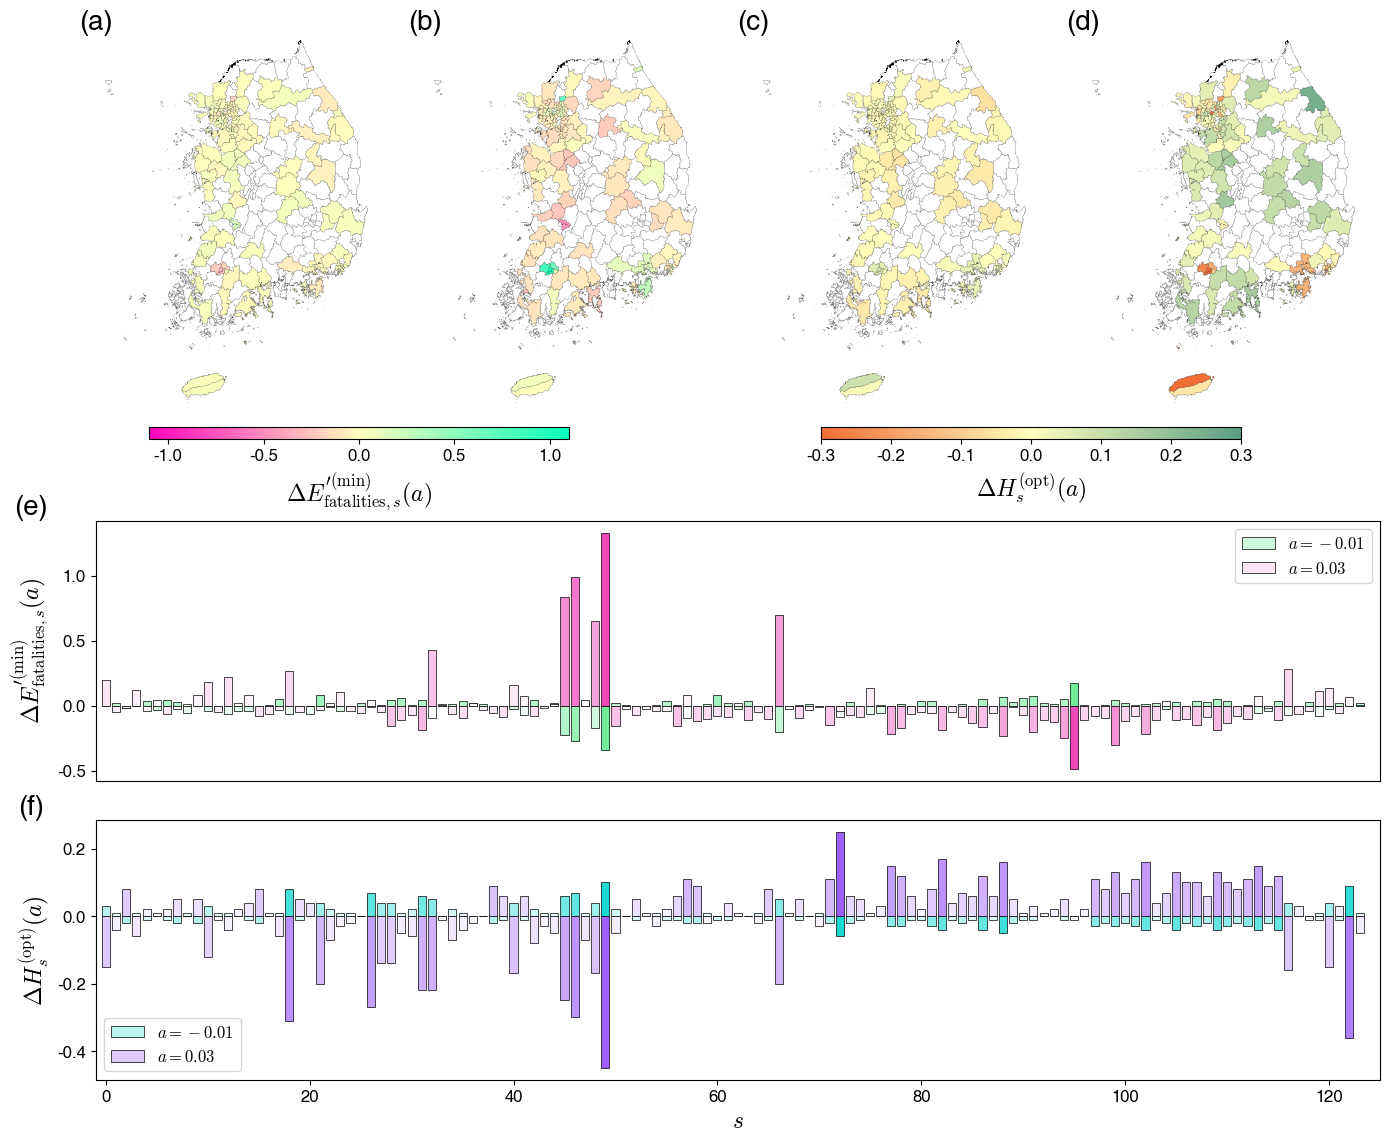

In [28]:
fig = plt.figure(figsize=[14, 12])  # Adjust figure size
gs = GridSpec(3, 4, figure=fig, height_ratios=[2, 1, 1])  # First row for maps, second row for scatter plot
ticksize=12
title_pos = [-0., 1.]
title_size = 20

colors_0 = ['#FFFFFF']
cmap_0 = LinearSegmentedColormap.from_list('zero_cmap', colors_0, gamma=1)
norm_0 = mpl.colors.Normalize(vmin=0, vmax=0.1)

color_map1 = ['#F26E36', '#FFFEBD', '#5A9F84']
cmap_1 = LinearSegmentedColormap.from_list('my_cmap1', color_map1, gamma=1)

color_map2 = ['#FF04BD', '#FFFEBD', '#09FEBD']
cmap_2 = LinearSegmentedColormap.from_list('my_cmap2', color_map2, gamma=1)

map_columns = ['E_005_d', 'E_005d', 'h_005_d', 'h_005d']
cmap_list = [cmap_2, cmap_2, cmap_1, cmap_1]
labels = [r'$\Delta E^\mathrm{\prime(min)}_{\mathrm{fatalities},s}(a)$', r'$\Delta E^\mathrm{\prime(min)}_{\mathrm{fatalities},s}(a)$', r'$\Delta H^\mathrm{(opt)}_s(a)$', r'$\Delta H^\mathrm{(opt)}_s(a)$']
titles = ['(a)', '(b)', '(c)', '(d)']
vrange=[1.1,1.1, 0.3,0.3]

axes = []
for i, (col, cmap, label, title) in enumerate(zip(map_columns, cmap_list, labels, titles)):
	ax = fig.add_subplot(gs[0, i])  # 2x2 그리드
	norm = Normalize(vmin=-vrange[i], vmax=vrange[i])
	# kr_sgg[kr_sgg[col] != 0].plot(column=col, ax=ax, cmap=cmap, ec='k', norm=norm, legend=False, 
	#                              vmin=-vrange[i], vmax=vrange[i], alpha=1, linewidth=0.1)
	kr_sgg.plot(column=col, ax=ax, cmap=cmap, ec='k', norm=norm, legend=False, 
	                             vmin=-vrange[i], vmax=vrange[i], alpha=1, linewidth=0.1)
	kr_sgg[kr_sgg[col].isna()].plot(column=col, ax=ax, ec='k', color='#FFFFFF', alpha=1, linewidth=0.1)
	ax.set_xlim(0.73e6, 1.23e6)
	ax.axis(False)
	ax.text(title_pos[0], title_pos[1], title, fontsize=title_size, ha='center', va='center', transform=ax.transAxes)
	axes.append(ax)

# 컬러바 추가 (각 row에 하나씩)
colorbar_positions = [0.11, 0.59]
for column in range(2):
	cb_ax = fig.add_axes([colorbar_positions[column], 0.59, 0.3, 0.01])  # row 위치에 맞춰 컬러바 배치
	cbar = fig.colorbar(ScalarMappable(cmap=cmap_list[column*2], norm=Normalize(vmin=-vrange[column*2], vmax=vrange[column*2])),
	                    cax=cb_ax, orientation='horizontal')
	cbar.set_label(labels[column*2], labelpad=5, fontsize=17)
	cb_ax.tick_params(labelsize=ticksize)


dh_005_ = data['h_opt_005_'] - data['h_opt_0']
dh_005 = data['h_opt_005'] - data['h_opt_0']
dE_005_ = data['E_opt_005_'] - data['E_opt_0']
dE_005 = data['E_opt_005'] - data['E_opt_0']

x_range = np.arange(len(dh_005))  # X축 인덱스 생성

# 컬러맵 설정 (0을 중간값으로 설정, 각 그래프별로 따로 적용)
norm_dh_ = mcolors.TwoSlopeNorm(vmin=min(dh_005_), vcenter=0, vmax=max(dh_005_))
norm_dh = mcolors.TwoSlopeNorm(vmin=min(dh_005), vcenter=0, vmax=max(dh_005))
norm_dE_ = mcolors.TwoSlopeNorm(vmin=min(dE_005_), vcenter=-0.1, vmax=max(dE_005_))
norm_dE = mcolors.TwoSlopeNorm(vmin=min(dE_005), vcenter=0, vmax=max(dE_005))
color_map1_ = ['#18DAD2', '#FFFFFF', '#18DAD2']
cmap_1_ = LinearSegmentedColormap.from_list('my_cmap2', color_map1_, gamma=1)
color_map1 = ['#9E5FFD', '#FFFFFF', '#9E5FFD']
cmap_1 = LinearSegmentedColormap.from_list('my_cmap2', color_map1, gamma=1)
color_map2_ = [rgb_to_hex(111,237,155), '#FFFFFF', rgb_to_hex(111,237,155)]
cmap_2_ = LinearSegmentedColormap.from_list('my_cmap2', color_map2_, gamma=1)
color_map2 = [rgb_to_hex(237,74,184), '#FFFFFF', rgb_to_hex(237,74,184)]
cmap_2 = LinearSegmentedColormap.from_list('my_cmap2', color_map2, gamma=1)


ax = fig.add_subplot(gs[2, :])
bar_colors_ = [cmap_1_(norm_dh_(val)) for val in dh_005_]
bar_colors = [cmap_1(norm_dh(val)) for val in dh_005]
ax.bar(x_range, dh_005_, color=bar_colors_, label=r'$a=-0.01$',ec='k', linewidth=0.5)
ax.bar(x_range, dh_005, color=bar_colors, label=r'$a=0.03$',ec='k', linewidth=0.5)
# ax.axhline(0, color='gray', linestyle='--', linewidth=1.5)
ax.set_ylabel(r'$\Delta H^\mathrm{(opt)}_s(a)$',size=17)
# ax.set_yticklabels(ax.get_yticks(), fontsize=ticksize)
ax.text(-0.05, 1.05, '(f)', fontsize=title_size, ha='center', va='center', transform=ax.transAxes)
ax.legend(loc=3, fontsize='large')
ax.tick_params(axis='both', labelsize=ticksize)
ax.set_xlabel(r'$s$', size=17)
ax.set_xlim(-1,125)

ax1 = fig.add_subplot(gs[1, :])
bar_colors1_ = [cmap_2_(norm_dE_(val)) for val in dE_005_]
bar_colors1 = [cmap_2(norm_dE(val)) for val in dE_005]
ax1.bar(x_range, dE_005_, color=bar_colors1_, label=r'$a=-0.01$',ec='k', linewidth=0.5)
ax1.bar(x_range, dE_005, color=bar_colors1, label=r'$a=0.03$',ec='k', linewidth=0.5)
# ax1.axhline(0, color='gray', linestyle='--', linewidth=1.5)
ax1.text(-0.05, 1.05, '(e)', fontsize=title_size, ha='center', va='center', transform=ax1.transAxes)
ax1.legend(loc=1, fontsize='large')
# ax1.set_xticklabels(rotation=75, fontsize=8)
# ax1.set_yticklabels(ax1.get_yticks(), fontsize=ticksize)
ax1.tick_params(axis='both', labelsize=ticksize)
ax1.set_ylabel(r'$\Delta E^\mathrm{\prime(min)}_{\mathrm{fatalities},s}(a)$',size=17)
ax1.set_xticks([])
ax1.set_xlim(-1,125)

plt.tight_layout()
# plt.savefig('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/figure/dh_dE_aa.png',dpi=300, transparent=True)
plt.show()

In [17]:
data

,sido,sigungu,h,A,N,D,RN0_9,RN10_19,RN20_29,RN30_39,...,eta_tilde50_59,eta_tilde60_69,eta_tilde70_79,eta_tilde80_,h_opt_0,h_opt_005_,h_opt_005,E_opt_0,E_opt_005_,E_opt_005
0,Seoul,강남구,3,39.501308,71,6,0.000363,0.011248,0.057692,0.082729,...,0.024669,0.026735,0.030209,0.052519,2.67,2.70,2.52,7.533243,7.529381,7.729048
1,Seoul,강동구,3,24.589280,126,6,0.000363,0.011248,0.057692,0.082729,...,0.033406,0.035733,0.039514,0.060408,2.99,3.00,2.95,6.052538,6.076201,6.004486
2,Seoul,강북구,1,23.596920,98,12,0.000363,0.011248,0.057692,0.082729,...,0.015651,0.017158,0.019773,0.039414,1.75,1.73,1.83,3.880726,3.860433,3.862456
3,Seoul,강서구,4,41.436729,167,12,0.000363,0.011248,0.057692,0.082729,...,0.029787,0.032147,0.036071,0.060024,4.38,4.39,4.32,9.755441,9.754787,9.876317
4,Seoul,관악구,1,29.568727,152,5,0.000363,0.011248,0.057692,0.082729,...,0.008408,0.008937,0.009781,0.014153,1.34,1.33,1.36,1.862825,1.896081,1.826132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Gyeongnam,진주시,4,712.957223,102,13,0.001925,0.009625,0.034649,0.049086,...,0.002373,0.002078,0.002488,0.004601,4.07,4.08,4.06,12.505531,12.428702,12.620207
120,Gyeongnam,창원시,12,747.673362,260,26,0.001925,0.009625,0.034649,0.049086,...,0.006158,0.005454,0.006427,0.010979,10.71,10.75,10.56,31.817384,31.789470,31.954727
121,Gyeongnam,통영시,1,239.815884,55,4,0.001925,0.009625,0.034649,0.049086,...,0.001426,0.001279,0.001481,0.002342,1.22,1.21,1.25,2.434716,2.456978,2.381607
122,Jeju,제주시,5,978.426995,149,12,0.000000,0.015306,0.020408,0.086735,...,0.001707,0.001483,0.002585,0.002984,4.98,5.07,4.62,12.105198,12.116794,12.171129


In [29]:
def sp_region(datE, dath):
    # 사분면 1
    mask_1 = np.logical_and(dath > 0, datE > 0)
    d_1 = np.where(mask_1, dath * datE, np.nan)  # 조건을 만족하지 않으면 NaN
    id_1 = np.nanargmax(d_1)  # NaN 제외한 최대값 인덱스

    # 사분면 2
    mask_2 = np.logical_and(dath > 0, datE < 0)
    d_2 = np.where(mask_2, dath * -datE, np.nan)
    id_2 = np.nanargmax(d_2)

    # 사분면 3
    mask_3 = np.logical_and(dath < 0, datE < 0)
    d_3 = np.where(mask_3, -dath * -datE, np.nan)
    id_3 = np.nanargmax(d_3)

    # 사분면 4
    mask_4 = np.logical_and(dath < 0, datE > 0)
    d_4 = np.where(mask_4, -dath * datE, np.nan)
    id_4 = np.nanargmax(d_4)

    return id_1, id_2, id_3, id_4

각 사분면에서 가장 큰 것들(xy값이 가장 큰?) 골라서 특징 비교

### 특정 도시 자세히 확인

In [30]:
def RN_RD_40(id):
	RN_data = data.iloc[id, 10:15]
	RD_data = data.iloc[id, 19:24]
	return RN_data, RD_data

def N_D_40(id):
	N_data = data.iloc[id, 10:15]*int(data.iloc[id]['N'])
	D_data = data.iloc[id, 19:24]*int(data.iloc[id]['D'])
	return N_data, D_data

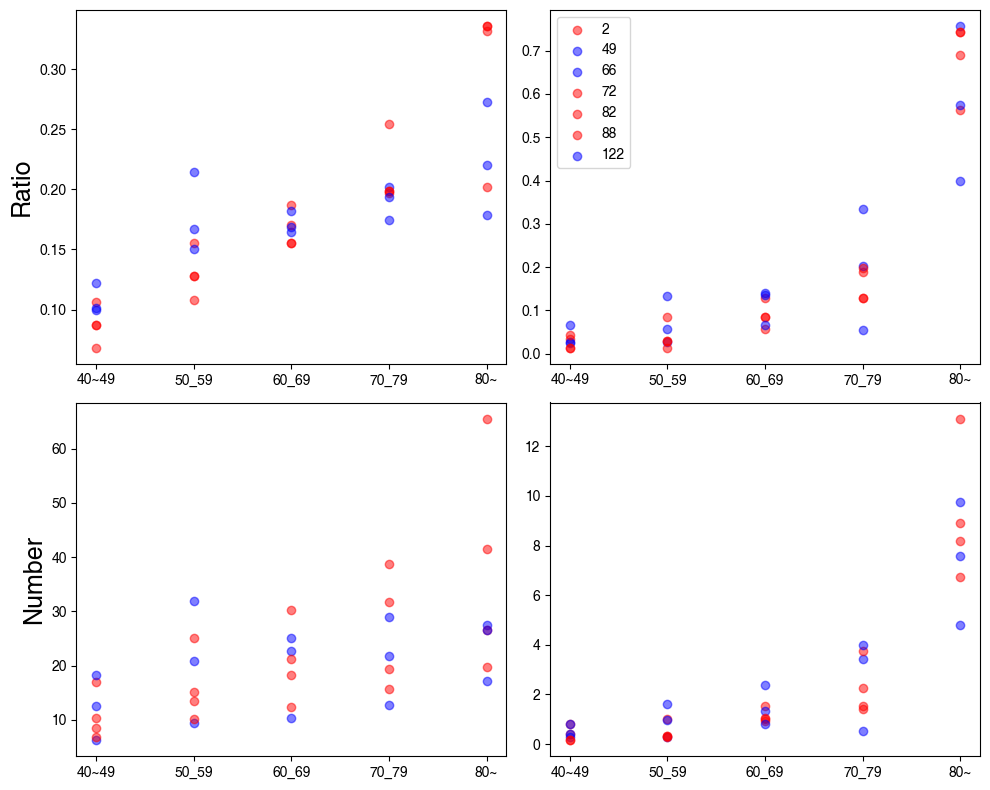

In [31]:
age_list = ['40~49', '50_59', '60_69', '70_79', '80~']
fig = plt.figure(figsize=[10, 8])  # Adjust figure size
gs = GridSpec(2, 2, figure=fig)
ax = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
for id in [2, 49, 66, 72, 82, 88, 122]:
	RN, RD = RN_RD_40(id)
	N, D = N_D_40(id)
	if id in [49, 66, 122]: color = 'b'
	else: color ='r'
	ax.scatter(age_list, RN, label=str(id), c=color, alpha = 0.5)
	ax1.scatter(age_list, RD, label=str(id), c=color, alpha = 0.5)
	ax2.scatter(age_list, N, label=str(id), c=color, alpha = 0.5)
	ax3.scatter(age_list, D, label=str(id), c=color, alpha = 0.5)

ax.set_ylabel(r'Ratio',size=18)
ax2.set_ylabel(r'Number',size=18)
ax1.legend()
plt.tight_layout()
plt.show()

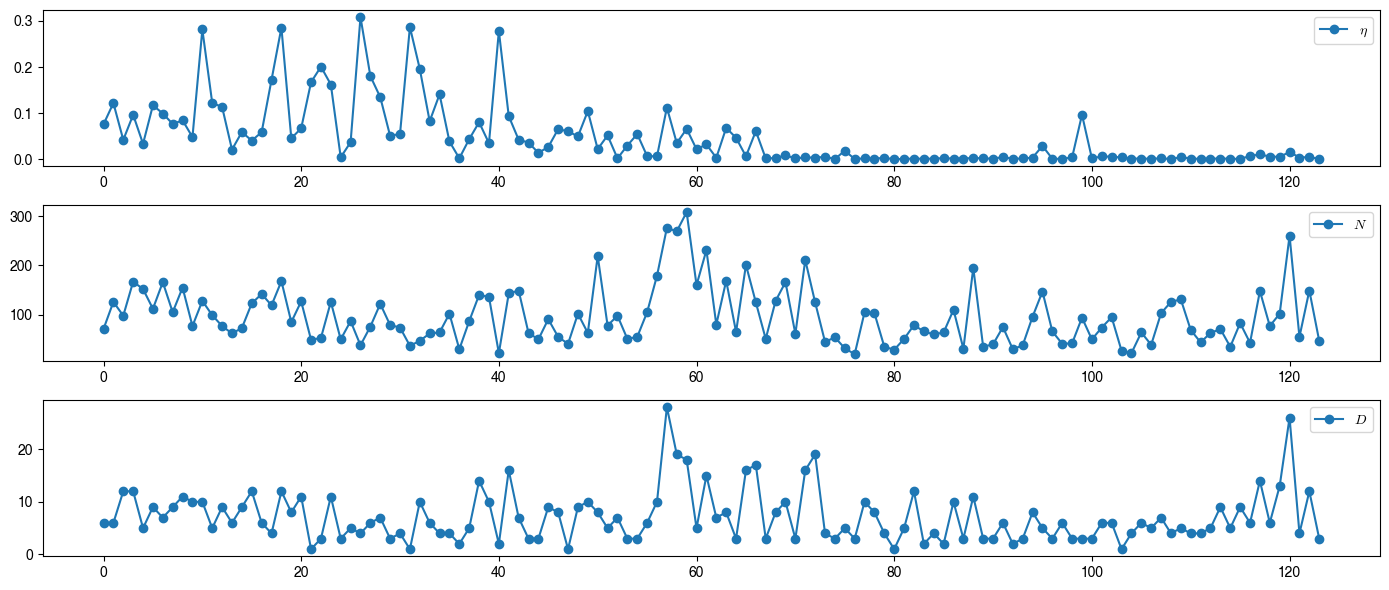

In [32]:
eta = data['h']/data['A']
fig = plt.figure(figsize=[14, 6])  # Adjust figure size
gs = GridSpec(3, 1, figure=fig)
ax1 = fig.add_subplot(gs[0])
ax1.plot(range(len(data)), eta, marker='o', label= r'$\eta$')

ax2 = fig.add_subplot(gs[1])
ax2.plot(range(len(data)), data['N'], marker='o', label=r'$N$')

ax3 = fig.add_subplot(gs[2])
ax3.plot(range(len(data)), data['D'], marker='o', label=r'$D$')

ax1.legend()
ax2.legend()
ax3.legend()
plt.tight_layout()
plt.show()

#### 지역별 환자 & 사망자 연령 특징 보기

##### STD

In [33]:
def std_RN_RD_40(id):
	RN_data = data.iloc[id, 10:15]
	RD_data = data.iloc[id, 19:24]
	return np.std(RN_data.values), np.std(RD_data.values)

def std_N_D_40(id):
	N_data = data.iloc[id, 10:15]*int(data.iloc[id]['N'])
	D_data = data.iloc[id, 19:24]*int(data.iloc[id]['D'])
	return np.std(N_data.values), np.std(D_data.values)

In [34]:
std_rn_list,std_rd_list,std_n_list,std_d_list=[],[],[],[]
for id in range(len(data)):
    std_RN,std_RD =  std_RN_RD_40(id)
    std_N, std_D = std_N_D_40(id)
    std_rn_list.append(std_RN)
    std_rd_list.append(std_RD)
    std_n_list.append(std_N)
    std_d_list.append(std_D)


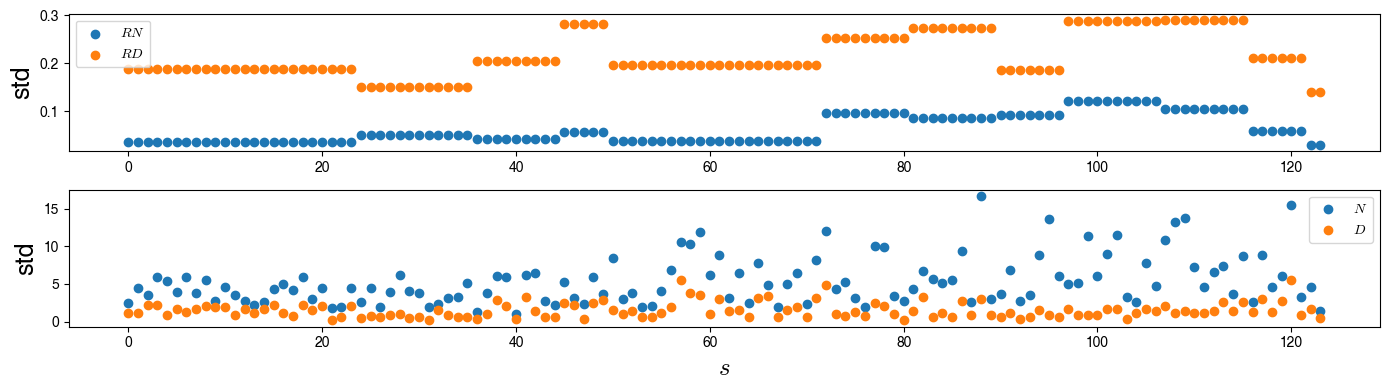

In [35]:
fig = plt.figure(figsize=[14, 4])  # Adjust figure size
gs = GridSpec(2, 1, figure=fig)
ax = fig.add_subplot(gs[0])
ax.scatter(range(len(data)), std_rn_list, label=r'$RN$')
ax.scatter(range(len(data)), std_rd_list, label=r'$RD$')
ax.set_ylabel(r'std',size=18)
ax.legend()

ax1 = fig.add_subplot(gs[1])
ax1.scatter(range(len(data)), std_n_list, label=r'$N$')
ax1.scatter(range(len(data)), std_d_list, label=r'$D$')
ax1.set_ylabel(r'std',size=18)
ax1.set_xlabel(r'$s$',size=18)
ax1.legend()

plt.tight_layout()
plt.show()

### 광주 확인해보기

광주 동구를 제외한 지역에서 큰 차이가 보임

In [36]:
data

,sido,sigungu,h,A,N,D,RN0_9,RN10_19,RN20_29,RN30_39,...,eta_tilde50_59,eta_tilde60_69,eta_tilde70_79,eta_tilde80_,h_opt_0,h_opt_005_,h_opt_005,E_opt_0,E_opt_005_,E_opt_005
0,Seoul,강남구,3,39.501308,71,6,0.000363,0.011248,0.057692,0.082729,...,0.024669,0.026735,0.030209,0.052519,2.67,2.70,2.52,7.533243,7.529381,7.729048
1,Seoul,강동구,3,24.589280,126,6,0.000363,0.011248,0.057692,0.082729,...,0.033406,0.035733,0.039514,0.060408,2.99,3.00,2.95,6.052538,6.076201,6.004486
2,Seoul,강북구,1,23.596920,98,12,0.000363,0.011248,0.057692,0.082729,...,0.015651,0.017158,0.019773,0.039414,1.75,1.73,1.83,3.880726,3.860433,3.862456
3,Seoul,강서구,4,41.436729,167,12,0.000363,0.011248,0.057692,0.082729,...,0.029787,0.032147,0.036071,0.060024,4.38,4.39,4.32,9.755441,9.754787,9.876317
4,Seoul,관악구,1,29.568727,152,5,0.000363,0.011248,0.057692,0.082729,...,0.008408,0.008937,0.009781,0.014153,1.34,1.33,1.36,1.862825,1.896081,1.826132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Gyeongnam,진주시,4,712.957223,102,13,0.001925,0.009625,0.034649,0.049086,...,0.002373,0.002078,0.002488,0.004601,4.07,4.08,4.06,12.505531,12.428702,12.620207
120,Gyeongnam,창원시,12,747.673362,260,26,0.001925,0.009625,0.034649,0.049086,...,0.006158,0.005454,0.006427,0.010979,10.71,10.75,10.56,31.817384,31.789470,31.954727
121,Gyeongnam,통영시,1,239.815884,55,4,0.001925,0.009625,0.034649,0.049086,...,0.001426,0.001279,0.001481,0.002342,1.22,1.21,1.25,2.434716,2.456978,2.381607
122,Jeju,제주시,5,978.426995,149,12,0.000000,0.015306,0.020408,0.086735,...,0.001707,0.001483,0.002585,0.002984,4.98,5.07,4.62,12.105198,12.116794,12.171129


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
year= 2022
path='/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/'
data = pd.read_csv(path+'data_over40/'+str(year)+'_40.txt',sep=',')

In [39]:
year= 2022
i_0=15# a=0
i_005_=14#10 a=-0.01
i_005=18#20 a=0.03
path='/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/'
data = pd.read_csv(path+'data_over40/'+str(year)+'_40.txt',sep=',')
a_0 = np.linspace(-0.15, 0.05, 21)[i_0]
a_005_ = np.linspace(-0.15, 0.05, 21)[i_005_]
a_005 = np.linspace(-0.15, 0.05, 21)[i_005]
h_opt_0 = pd.read_csv(path+'at_b/opt_E_h_a015_005/'+str(year)+'MC_age_h_opt_a_'+str(i_0)+'.csv')
h_opt_005_ = pd.read_csv(path+'at_b/opt_E_h_a015_005/'+str(year)+'MC_age_h_opt_a_'+str(i_005_)+'.csv')
h_opt_005 = pd.read_csv(path+'at_b/opt_E_h_a015_005/'+str(year)+'MC_age_h_opt_a_'+str(i_005)+'.csv')
b_0=b(data,a_0)
b_005_=b(data,a_005_)
b_005=b(data,a_005)

data['h_opt_0'] = h_opt_0
data['h_opt_005_'] = h_opt_005_
data['h_opt_005'] = h_opt_005

data['E_opt_0'] = E(data,h_pd=h_opt_0,a=a_0,b=b_0)
data['E_opt_005_'] = E(data,h_pd=h_opt_005_,a=a_005_,b=b_005_)
data['E_opt_005'] = E(data,h_pd=h_opt_005,a=a_005,b=b_005)
dh_005_ = data['h_opt_005_'] - data['h_opt_0']
dh_005 = data['h_opt_005'] - data['h_opt_0']
dE_005_ = data['E_opt_005_'] - data['E_opt_0']
dE_005 = data['E_opt_005'] - data['E_opt_0']

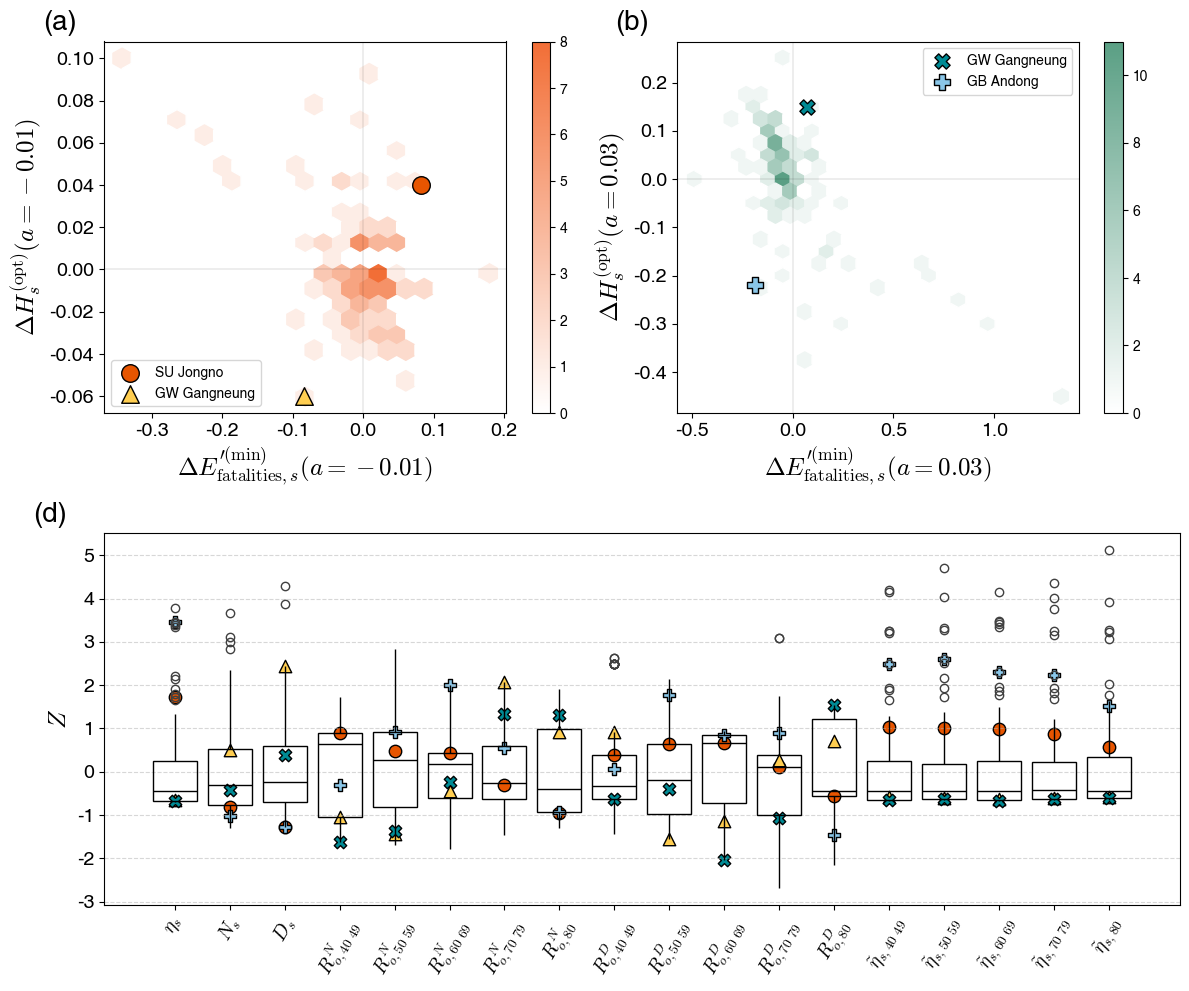

In [70]:
color_lis = [rgb_to_hex(231,85,0), rgb_to_hex(255,206,81), rgb_to_hex(0,138,148), '#8AC6E8']
color_list = [rgb_to_hex(237,74,184),rgb_to_hex(158,95,253),rgb_to_hex(255,206,81),rgb_to_hex(119,200,236),rgb_to_hex(24,218,210),rgb_to_hex(111,237,155),rgb_to_hex(102,0,51),rgb_to_hex(0,0,0),rgb_to_hex(211,196,147),rgb_to_hex(186,159,72),rgb_to_hex(89,80,65),rgb_to_hex(231,85,0),rgb_to_hex(0,138,148),rgb_to_hex(223,105,98)]
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
mark=np.array(['v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X','o', 'v', '^', '<', '>', '8', 's', 'p', ])
mar = np.array(['o', '^', 'X', 'P'])
si_label=['SU Jongno', 'GJ Seogu', 'GW Gangneung' ,'CN Cheonan', 'GB Andong', 'JN Mokpo', 'BS Seogu', 'GJ Seogu']
exclude_columns = [0,1]+list(range(6, 10)) + list(range(15, 19)) + list(range(29, len(data.columns)))
data_r = data.drop(data.columns[exclude_columns], axis=1)
data_r.insert(0, 'eta', data_r['h']/data_r['A'])  # 맨 앞에 추가
data_r = data_r.drop(columns=[data_r.columns[1], data_r.columns[2]])
# 데이터프레임 Z-스코어 정규화
data_z = (data_r - data_r.mean()) / data_r.std()
x_positions = np.arange(len(data_z.columns))

fig = plt.figure(figsize=(12, 10))
gs = GridSpec(2,2, height_ratios=[1,1])
#['#F26E36', '#FFFEBD', '#5A9F84']
ax=fig.add_subplot(gs[0, 0])
ax.axhline(0, color='black', linewidth=0.1)  # y=0 (수평선)
ax.axvline(0, color='black', linewidth=0.1)  # x=0 (수직선)
# ax.scatter(dh_005_, dE_005_, fc='none', ec='k', s=80, alpha=0.5) # a=-0.01 저연령 '#18DAD2' , label=r'$a=-0.01$'
color_map1 = ['#FFFFFF', '#F26E36']
cmap_1 = LinearSegmentedColormap.from_list('my_cmap1', color_map1, gamma=1)
hb1 = ax.hexbin(dE_005_, dh_005_, gridsize=20, cmap=cmap_1)
fig.colorbar(hb1, ax=ax)

sp_list1 = sp_region(dE_005_, dh_005_)
c=0
c__ = 0
for id in sp_list1:
    if c in [0, 2]:
        ax.scatter(dE_005_[id], dh_005_[id], c=color_lis[c__], ec='k', marker=mar[c__], s=160, alpha=1, label=si_label[c])
        c__+=1
    c+=1
ax.set_ylabel(r'$\Delta H^\mathrm{(opt)}_s(a=-0.01)$',size=18)
ax.set_xlabel(r'$\Delta E^\mathrm{\prime(min)}_{\mathrm{fatalities},s}(a=-0.01)$',size=18)

ax.tick_params(axis='both', labelsize=14)
ax.text(-0.05-0.06, 1.05, '(a)', fontsize=title_size, ha='center', va='center', transform=ax.transAxes)
ax.legend(loc=3)

ax1=fig.add_subplot(gs[0, 1])
ax1.axhline(0, color='black', linewidth=0.1)  # y=0 (수평선)
ax1.axvline(0, color='black', linewidth=0.1)  # x=0 (수직선)
# ax1.scatter(dh_005, dE_005, fc='none', ec='k', s=70, alpha=0.5, marker='s') # a=0.03 고연령 rgb_to_hex(237,74,184) , label=r'$a=0.03$'
color_map2 = ['#FFFFFF', '#5A9F84']
cmap_2 = LinearSegmentedColormap.from_list('my_cmap1', color_map2, gamma=1)
hb2 = ax1.hexbin(dE_005, dh_005, gridsize=25, cmap=cmap_2)
fig.colorbar(hb2, ax=ax1)
sp_list2 = sp_region(dE_005, dh_005)
c=0
for id in sp_list2:
    if c in [0, 2]:
        ax1.scatter(dE_005[id], dh_005[id], c=color_lis[c__], ec='k', marker=mar[c__], s=120, alpha=1, label=si_label[c+2])
        c__+=1
    c+=1
ax1.set_ylabel(r'$\Delta H^\mathrm{(opt)}_s(a=0.03)$',size=18)
ax1.set_xlabel(r'$\Delta E^\mathrm{\prime(min)}_{\mathrm{fatalities},s}(a=0.03)$',size=18)
# ax1.set_ylabel(r'$dE$',size=18)
ax1.text(-0.05-0.06, 1.05, '(b)', fontsize=title_size, ha='center', va='center', transform=ax1.transAxes)
ax1.tick_params(axis='both', labelsize=14)
ax1.legend()

# ax2=fig.add_subplot(gs[1,:])
# sns.boxplot(data=data_z, boxprops={'facecolor': 'none', 'edgecolor': 'black'}, showcaps=False, whiskerprops={'color': 'black'}, medianprops={'color': 'black'})
# # 선택한 인덱스의 값들을 scatter로 표시
# c=0
# for i, idx in enumerate(sp_list1):
#     y_values = data_z.loc[idx, :]
#     ax2.scatter(x_positions, y_values, color=color_list[c], marker=mark[c], label=f'Index {idx}', s=80, edgecolors='black')
#     c+=1
# ax2.set_ylabel(r"$Z$",size=18)
# ax2.tick_params(axis='both', labelsize=14)
# ax2.set_xticks([])
# # ax2.legend()
# ax2.grid(axis='y', linestyle='--', alpha=0.5)
# ax2.text(-0.05, 1.05, '(c)', fontsize=title_size, ha='center', va='center', transform=ax2.transAxes)

ax3=fig.add_subplot(gs[1,:])
sns.boxplot(data=data_z, boxprops={'facecolor': 'none', 'edgecolor': 'black'}, showcaps=False, whiskerprops={'color': 'black'}, medianprops={'color': 'black'})
# 선택한 인덱스의 값들을 scatter로 표시

c=0
c__=0
for i, idx in enumerate(sp_list1):
    
    if c in [0,2]:
        y_values = data_z.loc[idx, :]
        ax3.scatter(x_positions, y_values, color=color_lis[c__],marker=mar[c__], label=f'Index {idx}', s=80, edgecolors='black')
        c__+=1
    c+=1

c=0
for i, idx in enumerate(sp_list2):
    
    if c in [0,2]:
        y_values = data_z.loc[idx, :]
        ax3.scatter(x_positions, y_values, color=color_lis[c__],marker=mar[c__], label=f'Index {idx}', s=80, edgecolors='black')
        c__+=1
    c+=1
# 그래프 꾸미기
ax3.set_xticks(x_positions)
custom_labels = [r'$\eta_s$', r'$N_s$', r'$D_s$', 
                 r'$R^N_{o,\mathrm{40~49}}$', r'$R^N_{o,\mathrm{50~59}}$', r'$R^N_{o,\mathrm{60~69}}$', r'$R^N_{o,\mathrm{70~79}}$', r'$R^N_{o,\mathrm{80~}}$', 
                 r'$R^D_{o,\mathrm{40~49}}$', r'$R^D_{o,\mathrm{50~59}}$', r'$R^D_{o,\mathrm{60~69}}$', r'$R^D_{o,\mathrm{70~79}}$', r'$R^D_{o,\mathrm{80~}}$', 
                 r'$\tilde\eta_{s,\mathrm{40~49}}$', r'$\tilde\eta_{s,\mathrm{50~59}}$', r'$\tilde\eta_{s,\mathrm{60~69}}$', r'$\tilde\eta_{s,\mathrm{70~79}}$', r'$\tilde\eta_{s,\mathrm{80}}$']
ax3.set_xticklabels(custom_labels, rotation=60, size=14)
ax3.tick_params(axis='both', labelsize=14)
ax3.set_ylabel(r"$Z$",size=18)
# ax3.legend()
ax3.grid(axis='y', linestyle='--', alpha=0.5)
ax3.text(-0.05, 1.05, '(d)', fontsize=title_size, ha='center', va='center', transform=ax3.transAxes)
plt.tight_layout()  # 전체 레이아웃 정리 (원하는 경우)

# ax2와 ax3의 현재 위치 가져오기 (figure 좌표: [left, bottom, width, height])
pos2 = ax2.get_position()
pos3 = ax3.get_position()

# 예를 들어, ax3의 아래쪽 위치를 약간 올려서 간격을 좁힌다.
# (현재 ax3의 y0를 pos3[1]이라 하면, 이를 약간 증가시켜서 ax2와의 gap을 줄일 수 있습니다.)
gap_reduction = 0.07  # figure 좌표계 기준 조정값 (실험적으로 정하기)
# new_pos3 = [pos3.x0, pos3.y0 + gap_reduction, pos3.width, pos3.height]
# ax3.set_position(new_pos3)
# plt.savefig('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/figure/dH_dE_Zscore.pdf', format='pdf', transparent=True)
plt.show()

In [54]:
sp_region(dE_005_, dh_005_)

(21, 49, 72, 88)

In [55]:
sp_region(dE_005, dh_005)

(113, 99, 31, 49)

In [49]:
data

,sido,sigungu,h,A,N,D,RN0_9,RN10_19,RN20_29,RN30_39,...,eta_tilde50_59,eta_tilde60_69,eta_tilde70_79,eta_tilde80_,h_opt_0,h_opt_005_,h_opt_005,E_opt_0,E_opt_005_,E_opt_005
0,Seoul,강남구,3,39.501308,71,6,0.000363,0.011248,0.057692,0.082729,...,0.024669,0.026735,0.030209,0.052519,2.67,2.70,2.52,7.533243,7.529381,7.729048
1,Seoul,강동구,3,24.589280,126,6,0.000363,0.011248,0.057692,0.082729,...,0.033406,0.035733,0.039514,0.060408,2.99,3.00,2.95,6.052538,6.076201,6.004486
2,Seoul,강북구,1,23.596920,98,12,0.000363,0.011248,0.057692,0.082729,...,0.015651,0.017158,0.019773,0.039414,1.75,1.73,1.83,3.880726,3.860433,3.862456
3,Seoul,강서구,4,41.436729,167,12,0.000363,0.011248,0.057692,0.082729,...,0.029787,0.032147,0.036071,0.060024,4.38,4.39,4.32,9.755441,9.754787,9.876317
4,Seoul,관악구,1,29.568727,152,5,0.000363,0.011248,0.057692,0.082729,...,0.008408,0.008937,0.009781,0.014153,1.34,1.33,1.36,1.862825,1.896081,1.826132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Gyeongnam,진주시,4,712.957223,102,13,0.001925,0.009625,0.034649,0.049086,...,0.002373,0.002078,0.002488,0.004601,4.07,4.08,4.06,12.505531,12.428702,12.620207
120,Gyeongnam,창원시,12,747.673362,260,26,0.001925,0.009625,0.034649,0.049086,...,0.006158,0.005454,0.006427,0.010979,10.71,10.75,10.56,31.817384,31.789470,31.954727
121,Gyeongnam,통영시,1,239.815884,55,4,0.001925,0.009625,0.034649,0.049086,...,0.001426,0.001279,0.001481,0.002342,1.22,1.21,1.25,2.434716,2.456978,2.381607
122,Jeju,제주시,5,978.426995,149,12,0.000000,0.015306,0.020408,0.086735,...,0.001707,0.001483,0.002585,0.002984,4.98,5.07,4.62,12.105198,12.116794,12.171129


In [36]:
dE_005[90:]

90    -0.074549
91    -0.204220
92    -0.111093
93    -0.126203
94    -0.245212
95    -0.484868
96    -0.111189
97    -0.082355
98    -0.090853
99    -0.298701
100   -0.114658
101   -0.078328
102   -0.220675
103   -0.108684
104    0.038302
105   -0.110272
106   -0.099999
107   -0.151437
108   -0.083018
109   -0.186108
110   -0.131123
111   -0.080184
112   -0.099340
113    0.072687
114   -0.013608
115   -0.111801
116    0.283102
117   -0.062337
118   -0.042075
119    0.114676
120    0.137344
121   -0.053109
122    0.065931
123    0.005374
dtype: float64

In [103]:
# a=-0.01
for id in sp_list1:
	print(list(data.iloc[id, 0:2].values))
#a=0.03
for id in sp_list2:
	print(list(data.iloc[id, 0:2].values))

['Seoul', '종로구']
['Chungnam', '천안시']
['Gangwon', '강릉시']
['Gwangju', '서구']
['Gyeongbuk', '안동시']
['Gwangju', '서구']
['Busan', '서구']
['Jeonnam', '목포시']


In [ ]:
si_label=['SU Jongno', 'CN Cheonan', 'GW Gangneung', 'GJ Seogu', 'GB Andong', 'GJ Seogu', 'BS Seogu', 'JN Mokpo']

31: 부산 서구, 고령 가중치 떄 병원을 잃지만 사망자 줄음

49: 광주 서구, 고령 가중치 때 병원 많이 잃고 사망자 크게 늘음, 저연령 가중치 때 반대

72: 강릉, 고령 가중치 때 병원 많이 얻지만 사망자 소량 증가, 반대 때는 잃고 감소



4